# COVID-19 Project

In [102]:
#importing modules
import pandas as pd
import numpy as np
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from matplotlib import pyplot
import squarify
import datetime as dt
from scipy.stats import linregress


import gmaps
import os
import time
from pprint import pprint
import json

# Import API key
from config import api_key
print("Libraries Imported!")

Libraries Imported!


In [2]:
#importing country csv
file = "Resources/COVID19_open_line_list.csv"
file_df = pd.read_csv(file)

file_df = file_df.drop(['Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
                        'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
                        'Unnamed: 43', 'Unnamed: 44', 'geo_resolution', 'symptoms', 'travel_history_location',
                        'reported_market_exposure', 'additional_information', 'chronic_disease',
                        'chronic_disease_binary', 'source', 'sequence_available', 'outcome',
                        'date_death_or_discharge', 'notes_for_discussion', 'admin_id', 'location',
                        'admin3', 'admin2', 'data_moderator_initials', 'admin1', 'country_new',
                        'travel_history_dates', 'wuhan(0)_not_wuhan(1)', 'lives_in_Wuhan', 'date_admission_hospital'], axis=1)


dest_df = file_df[file_df['country']!= 'China']

# Dropped latitude because only abot 20 were missing
dest_df.dropna(subset=['country', 'latitude'], inplace=True)

dest_df.head()

/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ID age     sex            city            province country  latitude  \
638  645.0  48    male        Bordeaux  Nouvelle-Aquitaine  France  44.83780   
639  646.0  30  female           Paris       Ile-de-France  France  48.85660   
640  647.0  31    male           Paris       Ile-de-France  France  48.85660   
641  648.0  40    male  Narita Airport               Tokyo   Japan  35.76528   
642  649.0  30    male             NaN               Tokyo   Japan  35.71145   

     longitude date_onset_symptoms date_confirmation  
638    -0.5792          23.01.2020        24.01.2020  
639     2.3522          23.01.2020        24.01.2020  
640     2.3522          19.01.2020        24.01.2020  
641   140.3856          14.01.2020        24.01.2020  
642   139.4468          03.01.2020        15.01.2020

In [3]:
#Replace missing province with city
dest_df['province'] = dest_df.apply(
    lambda row: row['city'] if pd.isnull(row['province']) else row['province'],
    axis=1
)
dest_df.head()

/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ID age     sex            city            province country  latitude  \
638  645.0  48    male        Bordeaux  Nouvelle-Aquitaine  France  44.83780   
639  646.0  30  female           Paris       Ile-de-France  France  48.85660   
640  647.0  31    male           Paris       Ile-de-France  France  48.85660   
641  648.0  40    male  Narita Airport               Tokyo   Japan  35.76528   
642  649.0  30    male             NaN               Tokyo   Japan  35.71145   

     longitude date_onset_symptoms date_confirmation  
638    -0.5792          23.01.2020        24.01.2020  
639     2.3522          23.01.2020        24.01.2020  
640     2.3522          19.01.2020        24.01.2020  
641   140.3856          14.01.2020        24.01.2020  
642   139.4468          03.01.2020        15.01.2020

In [4]:
#inserting Wuhan coordinates
dest_df['Wuhan Lat'] = 30.5928
dest_df['Wuhan Lng'] = 114.3055
dest_df.rename(columns={"latitude": "End Lat", "longitude": "End Lng"}, inplace=True)
dest_df.head()

/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

ID age     sex            city            province country   End Lat  \
638  645.0  48    male        Bordeaux  Nouvelle-Aquitaine  France  44.83780   
639  646.0  30  female           Paris       Ile-de-France  France  48.85660   
640  647.0  31    male           Paris       Ile-de-France  France  48.85660   
641  648.0  40    male  Narita Airport               Tokyo   Japan  35.76528   
642  649.0  30    male             NaN               Tokyo   Japan  35.71145   

      End Lng date_onset_symptoms date_confirmation  Wuhan Lat  Wuhan Lng  
638   -0.5792          23.01.2020        24.01.2020    30.5928   114.3055  
639    2.3522          23.01.2020        24.01.2020    30.5928   114.3055  
640    2.3522          19.01.2020        24.01.2020    30.5928   114.3055  
641  140.3856          14.01.2020        24.01.2020    30.5928   114.3055  
642  139.4468          03.01.2020        15.01.2020    30.5928   114.3055

In [5]:
#ontario results
ontario_df = dest_df[dest_df['province']=="Ontario"]
ontario_df

ID    age     sex     city province country    End Lat    End Lng  \
676    683.0     56    male  Toronto  Ontario  Canada  43.667256 -79.391815   
1442  1465.0  50-59  female  Toronto  Ontario  Canada  43.667256 -79.391815   
4801  4871.0  20-29  female   London  Ontario  Canada  42.983611 -81.249722   

     date_onset_symptoms date_confirmation  Wuhan Lat  Wuhan Lng  
676           22.01.2020        25.01.2020    30.5928   114.3055  
1442                 NaN               NaN    30.5928   114.3055  
4801          24.01.2020        31.01.2020    30.5928   114.3055

In [6]:
#count of cases per country
cnt_df = pd.DataFrame(dest_df["country"].value_counts())
new_df = cnt_df.reset_index()
new_df.head()

index  country
0  South Korea      938
1        Japan      712
2        Italy      587
3    Singapore       90
4     Thailand       39

In [7]:
#renamed index and country
new_df.rename(columns={"index": "country", "country": "count"}, inplace=True)
new_df.head()

country  count
0  South Korea    938
1        Japan    712
2        Italy    587
3    Singapore     90
4     Thailand     39

In [8]:
#merging dataframes
full_df = pd.merge(dest_df, new_df, on="country", how="outer")
full_df.head()

ID    age     sex      city            province country   End Lat  \
0   645.0     48    male  Bordeaux  Nouvelle-Aquitaine  France  44.83780   
1   646.0     30  female     Paris       Ile-de-France  France  48.85660   
2   647.0     31    male     Paris       Ile-de-France  France  48.85660   
3  1872.0  80-89    male     Paris       Ile-de-France  France  48.85660   
4  2964.0    NaN  female       NaN                 NaN  France  46.68307   

    End Lng date_onset_symptoms date_confirmation  Wuhan Lat  Wuhan Lng  count  
0 -0.579200          23.01.2020        24.01.2020    30.5928   114.3055     19  
1  2.352200          23.01.2020        24.01.2020    30.5928   114.3055     19  
2  2.352200          19.01.2020        24.01.2020    30.5928   114.3055     19  
3  2.352200                 NaN        28.01.2020    30.5928   114.3055     19  
4  2.541928                 NaN        29.01.2020    30.5928   114.3055     19

In [9]:
#plotting scattergeo maps
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'country names',
    lon = full_df['End Lng'],
    lat = full_df['End Lat'],
    hoverinfo = 'text',
    text = full_df['country'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

for i, row in full_df.iterrows():
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'country names',
            lon = [row['Wuhan Lng'], row['End Lng']],
            lat = [row['Wuhan Lat'], row['End Lat']],
            hoverinfo = "text",
            text = row['country'],
            mode = 'lines',
            line = dict(width = 1,color = 'red'),
            opacity= float(row['count']) / float(full_df['count'].max())
        )
    )

fig.update_layout(
    title_text = 'COVID-19 Outbreak from the epi-center, Wuhan, to the World<br>(Hover for Country names)',
    showlegend = False,
    geo = dict(
        scope = 'world',
        projection_type = 'equirectangular',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)
fig.show()
plt.savefig('images/COVID-19 Outbreak from the epi-center.png')

<Figure size 432x288 with 0 Axes>

In [10]:
#inserting our datasource from Ontario website
data = pd.read_csv("resources/conposcovidloc.csv")
data.head()

Row_ID Accurate_Episode_Date Case_Reported_Date Test_Reported_Date  \
0       1            2020-03-08         2020-03-08         2020-03-11   
1       2            2020-03-11         2020-03-11         2020-03-15   
2       3            2020-03-07         2020-03-11         2020-03-11   
3       4            2020-03-07         2020-03-10         2020-03-11   
4       5            2020-03-09         2020-03-11         2020-03-10   

  Specimen_Date Age_Group Client_Gender Case_AcquisitionInfo  Outcome1  \
0    2020-03-10       40s        FEMALE               Travel  Resolved   
1    2020-03-11       60s        FEMALE                   CC  Resolved   
2    2020-03-10       20s        FEMALE               Travel  Resolved   
3    2020-03-10       50s          MALE               Travel  Resolved   
4    2020-03-10       <20        FEMALE               Travel  Resolved   

  Outbreak_Related                    Reporting_PHU  \
0              NaN             Ottawa Public Health   
1              NaN   Sudbury & District Health Unit   
2              NaN            Toronto Public Health   
3              NaN  Hamilton Public Health Services   
4              NaN            Toronto Public Health   

            Reporting_PHU_Address Reporting_PHU_City  \
0         100 Constellation Drive             Ottawa   
1               1300 Paris Street            Sudbury   
2  277 Victoria Street, 5th Floor            Toronto   
3    110 King St. West, 2nd Floor           Hamilton   
4  277 Victoria Street, 5th Floor            Toronto   

  Reporting_PHU_Postal_Code  \
0                   K2G 6J8   
1                   P3E 3A3   
2                   M5B 1W2   
3                   L8P 4S6   
4                   M5B 1W2   

                               Reporting_PHU_Website  Reporting_PHU_Latitude  \
0                          www.ottawapublichealth.ca               45.345665   
1                                        www.phsd.ca               46.466092   
2  www.toronto.ca/community-people/health-wellnes...               43.656591   
3                       www.hamilton.ca/publichealth               43.257631   
4  www.toronto.ca/community-people/health-wellnes...               43.656591   

   Reporting_PHU_Longitude  
0               -75.763912  
1               -80.998059  
2               -79.379358  
3               -79.871341  
4               -79.379358

In [11]:
data.describe()

Row_ID  Reporting_PHU_Latitude  Reporting_PHU_Longitude
count  35794.000000            35794.000000             35794.000000
mean   17897.500000               43.743719               -79.521235
std    10332.982104                0.718681                 1.572911
min        1.000000               42.308796               -94.488254
25%     8949.250000               43.647471               -79.708893
50%    17897.500000               43.656591               -79.379358
75%    26845.750000               43.656591               -79.379358
max    35794.000000               49.769615               -74.736298

In [12]:
#dropping unnecessary columns
data_drop = data.drop(columns=["Row_ID", "Accurate_Episode_Date", "Test_Reported_Date", "Specimen_Date", "Outbreak_Related",
                              "Reporting_PHU_Address", "Reporting_PHU_Website"])
data_drop.head()

Case_Reported_Date Age_Group Client_Gender Case_AcquisitionInfo  Outcome1  \
0         2020-03-08       40s        FEMALE               Travel  Resolved   
1         2020-03-11       60s        FEMALE                   CC  Resolved   
2         2020-03-11       20s        FEMALE               Travel  Resolved   
3         2020-03-10       50s          MALE               Travel  Resolved   
4         2020-03-11       <20        FEMALE               Travel  Resolved   

                     Reporting_PHU Reporting_PHU_City  \
0             Ottawa Public Health             Ottawa   
1   Sudbury & District Health Unit            Sudbury   
2            Toronto Public Health            Toronto   
3  Hamilton Public Health Services           Hamilton   
4            Toronto Public Health            Toronto   

  Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  Reporting_PHU_Longitude  
0                   K2G 6J8               45.345665               -75.763912  
1                   P3E 3A3               46.466092               -80.998059  
2                   M5B 1W2               43.656591               -79.379358  
3                   L8P 4S6               43.257631               -79.871341  
4                   M5B 1W2               43.656591               -79.379358

In [13]:
#renaming columns
data_rename = data_drop.rename(columns={"Case_Reported_Date": "Case Reported Date", "Age_Group": "Age",
                                      "Client_Gender": "Gender", "Case_AcquisitionInfo": "Virus Acquired",
                                     "Outcome1": "Outcome", "Reporting_PHU": "Hospital", "Reporting_PHU_City": "City",
                                     "Reporting_PHU_Postal_Code": "Hospital Postal Code",
                                      "Reporting_PHU_Latitude": "Hospital Latitude",
                                      "Reporting_PHU_Longitude": "Hospital Longitude"})
data_rename.head()

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-03-08  40s  FEMALE         Travel  Resolved   
1         2020-03-11  60s  FEMALE             CC  Resolved   
2         2020-03-11  20s  FEMALE         Travel  Resolved   
3         2020-03-10  50s    MALE         Travel  Resolved   
4         2020-03-11  <20  FEMALE         Travel  Resolved   

                          Hospital      City Hospital Postal Code  \
0             Ottawa Public Health    Ottawa              K2G 6J8   
1   Sudbury & District Health Unit   Sudbury              P3E 3A3   
2            Toronto Public Health   Toronto              M5B 1W2   
3  Hamilton Public Health Services  Hamilton              L8P 4S6   
4            Toronto Public Health   Toronto              M5B 1W2   

   Hospital Latitude  Hospital Longitude  
0          45.345665          -75.763912  
1          46.466092          -80.998059  
2          43.656591          -79.379358  
3          43.257631          -79.871341  
4          43.656591          -79.379358

In [14]:
data_rename[['Year', 'Month', 'Day']] = data_rename['Case Reported Date'].str.split("-", expand=True)
del data_rename['Year']
del data_rename['Day']

data_rename.head()

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-03-08  40s  FEMALE         Travel  Resolved   
1         2020-03-11  60s  FEMALE             CC  Resolved   
2         2020-03-11  20s  FEMALE         Travel  Resolved   
3         2020-03-10  50s    MALE         Travel  Resolved   
4         2020-03-11  <20  FEMALE         Travel  Resolved   

                          Hospital      City Hospital Postal Code  \
0             Ottawa Public Health    Ottawa              K2G 6J8   
1   Sudbury & District Health Unit   Sudbury              P3E 3A3   
2            Toronto Public Health   Toronto              M5B 1W2   
3  Hamilton Public Health Services  Hamilton              L8P 4S6   
4            Toronto Public Health   Toronto              M5B 1W2   

   Hospital Latitude  Hospital Longitude Month  
0          45.345665          -75.763912    03  
1          46.466092          -80.998059    03  
2          43.656591          -79.379358    03  
3          43.257631          -79.871341    03  
4          43.656591          -79.379358    03

In [15]:
#gender count
data_rename['Gender'].value_counts()

FEMALE         19094
MALE           16419
UNKNOWN          264
OTHER              9
TRANSGENDER        8
Name: Gender, dtype: int64

In [16]:
data_male = data_rename[data_rename['Gender'] == 'MALE']
data_male.head()

Case Reported Date  Age Gender Virus Acquired   Outcome  \
3          2020-03-10  50s   MALE         Travel  Resolved   
6          2020-03-12  40s   MALE         Travel  Resolved   
7          2020-03-12  60s   MALE         Travel  Resolved   
9          2020-03-11  40s   MALE         Travel  Resolved   
11         2020-03-11  20s   MALE         Travel  Resolved   

                               Hospital      City Hospital Postal Code  \
3       Hamilton Public Health Services  Hamilton              L8P 4S6   
6     Region of Waterloo, Public Health  Waterloo              N2J 4V3   
7                 Toronto Public Health   Toronto              M5B 1W2   
9   Simcoe Muskoka District Health Unit    Barrie              L4M 6K9   
11                Toronto Public Health   Toronto              M5B 1W2   

    Hospital Latitude  Hospital Longitude Month  
3           43.257631          -79.871341    03  
6           43.462876          -80.520913    03  
7           43.656591          -79.379358    03  
9           44.410713          -79.686306    03  
11          43.656591          -79.379358    03

In [17]:
data_female = data_rename[data_rename['Gender'] == 'FEMALE']
data_female.head()

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-03-08  40s  FEMALE         Travel  Resolved   
1         2020-03-11  60s  FEMALE             CC  Resolved   
2         2020-03-11  20s  FEMALE         Travel  Resolved   
4         2020-03-11  <20  FEMALE         Travel  Resolved   
5         2020-03-12  30s  FEMALE         Travel  Resolved   

                         Hospital      City Hospital Postal Code  \
0            Ottawa Public Health    Ottawa              K2G 6J8   
1  Sudbury & District Health Unit   Sudbury              P3E 3A3   
2           Toronto Public Health   Toronto              M5B 1W2   
4           Toronto Public Health   Toronto              M5B 1W2   
5     Eastern Ontario Health Unit  Cornwall              K6J 5T1   

   Hospital Latitude  Hospital Longitude Month  
0          45.345665          -75.763912    03  
1          46.466092          -80.998059    03  
2          43.656591          -79.379358    03  
4          43.656591          -79.379358    03  
5          45.029152          -74.736298    03

In [18]:
data_trans = data_rename[data_rename['Gender'] == 'TRANSGENDER']
data_trans.head()

Case Reported Date  Age       Gender Virus Acquired   Outcome  \
750           2020-03-23  <20  TRANSGENDER             CC  Resolved   
20137         2020-05-25  20s  TRANSGENDER             CC  Resolved   
26124         2020-05-18  30s  TRANSGENDER    No Epi-link  Resolved   
26258         2020-05-03  30s  TRANSGENDER             CC  Resolved   
26310         2020-06-26  80s  TRANSGENDER             OB  Resolved   

                                Hospital         City Hospital Postal Code  \
750    Region of Waterloo, Public Health     Waterloo              N2J 4V3   
20137                 Peel Public Health  Mississauga              L5W 1N4   
26124              Toronto Public Health      Toronto              M5B 1W2   
26258              Toronto Public Health      Toronto              M5B 1W2   
26310              Toronto Public Health      Toronto              M5B 1W2   

       Hospital Latitude  Hospital Longitude Month  
750            43.462876          -80.520913    03  
20137          43.647471          -79.708893    05  
26124          43.656591          -79.379358    05  
26258          43.656591          -79.379358    05  
26310          43.656591          -79.379358    06

In [19]:
data_other = data_rename[(data_rename['Gender'] == 'UNKNOWN') | (data_rename['Gender'] == 'OTHER')]
data_other.head()

Case Reported Date  Age   Gender Virus Acquired   Outcome  \
328          2020-03-18  60s  UNKNOWN             CC  Resolved   
886          2020-03-25  90s  UNKNOWN             OB     Fatal   
2185         2020-03-29  80s  UNKNOWN             OB     Fatal   
2244         2020-03-29  60s  UNKNOWN             OB  Resolved   
2725         2020-03-29  80s  UNKNOWN             OB  Resolved   

                   Hospital     City Hospital Postal Code  Hospital Latitude  \
328   Toronto Public Health  Toronto              M5B 1W2          43.656591   
886   Toronto Public Health  Toronto              M5B 1W2          43.656591   
2185  Toronto Public Health  Toronto              M5B 1W2          43.656591   
2244  Toronto Public Health  Toronto              M5B 1W2          43.656591   
2725  Toronto Public Health  Toronto              M5B 1W2          43.656591   

      Hospital Longitude Month  
328           -79.379358    03  
886           -79.379358    03  
2185          -79.379358    03  
2244          -79.379358    03  
2725          -79.379358    03

In [20]:
#city total case count
data_rename['City'].value_counts()

Toronto             13372
Mississauga          5918
Newmarket            3047
Ottawa               2109
Whitby               1710
Windsor              1658
Waterloo             1302
Hamilton              844
Oakville              761
Thorold               758
London                630
Barrie                602
Guelph                490
Simcoe                431
Brockville            355
Point Edward          286
Port Hope             200
Cornwall              165
Chatham               160
Brantford             132
Owen Sound            106
Kingston              104
Peterborough           95
Thunder Bay            93
St. Thomas             83
Sudbury                67
Timmins                67
Stratford              60
Belleville             44
Kenora                 39
North Bay              35
Pembroke               29
Sault Ste. Marie       24
New Liskeard           18
Name: City, dtype: int64

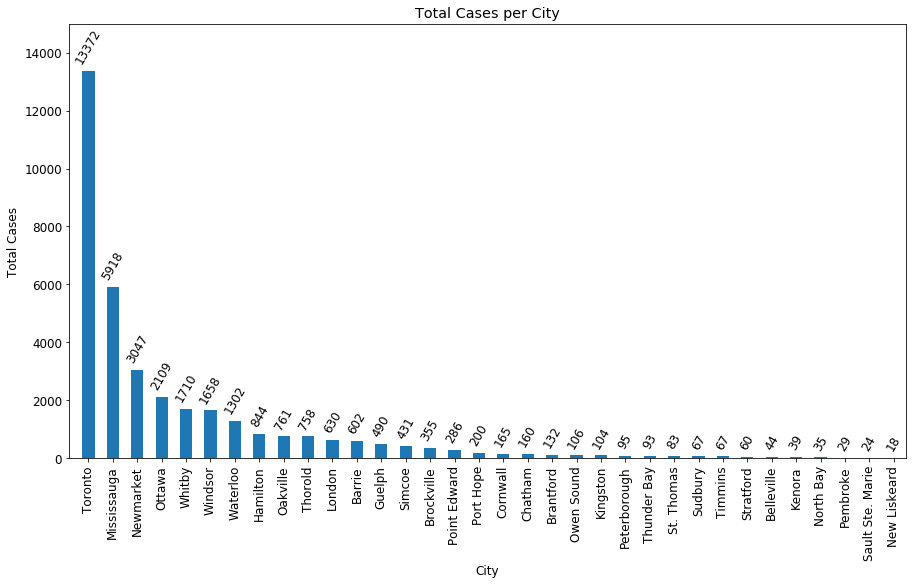

In [144]:
#bar graph for city vs total cases
city_plot = data_rename['City'].value_counts()


x_values = city_plot.index.tolist()
y_values = city_plot.values.tolist()

city_series = data_rename['City'].value_counts()

# Plot the figure.
plt.figure(figsize=(15, 8))
ax = city_series.plot(kind='bar')
ax.set_title('Total Cases per City')
ax.set_xlabel('City')
ax.set_ylabel('Total Cases')
ax.set_xlim(-0.8)
ax.set_ylim(0, 15000)
ax.set_xticklabels(x_values)


def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = y_value

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, rotation=60)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.savefig('images/Total Cases per City.png')
plt.show()

In [22]:
#index edit
age_df = pd.DataFrame(data_rename['Age'].value_counts())
age_df = age_df.reset_index()
age_df.replace({'index': r"<20"}, {'index': "10s"}, regex=True, inplace = True)
age_df = age_df.sort_values(["index"],ascending = True)
age_df

index   Age
8      10s  1763
1      20s  5472
3      30s  5010
2      40s  5097
0      50s  5779
4      60s  4072
6      70s  2678
5      80s  3472
7      90s  2442
9  UNKNOWN     9

In [23]:
#new age dataframe
age_df_new = age_df.replace({'index': r"10s"}, {'index': "<20"}, regex=True)
age_df_new

index   Age
8      <20  1763
1      20s  5472
3      30s  5010
2      40s  5097
0      50s  5779
4      60s  4072
6      70s  2678
5      80s  3472
7      90s  2442
9  UNKNOWN     9

In [24]:
data_age = data_rename.copy()
data_age['Age'][data_age['Age'] == '<20']="10s"

data_age.head()

/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-03-08  40s  FEMALE         Travel  Resolved   
1         2020-03-11  60s  FEMALE             CC  Resolved   
2         2020-03-11  20s  FEMALE         Travel  Resolved   
3         2020-03-10  50s    MALE         Travel  Resolved   
4         2020-03-11  10s  FEMALE         Travel  Resolved   

                          Hospital      City Hospital Postal Code  \
0             Ottawa Public Health    Ottawa              K2G 6J8   
1   Sudbury & District Health Unit   Sudbury              P3E 3A3   
2            Toronto Public Health   Toronto              M5B 1W2   
3  Hamilton Public Health Services  Hamilton              L8P 4S6   
4            Toronto Public Health   Toronto              M5B 1W2   

   Hospital Latitude  Hospital Longitude Month  
0          45.345665          -75.763912    03  
1          46.466092          -80.998059    03  
2          43.656591          -79.379358    03  
3          43.257631          -79.871341    03  
4          43.656591          -79.379358    03

/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



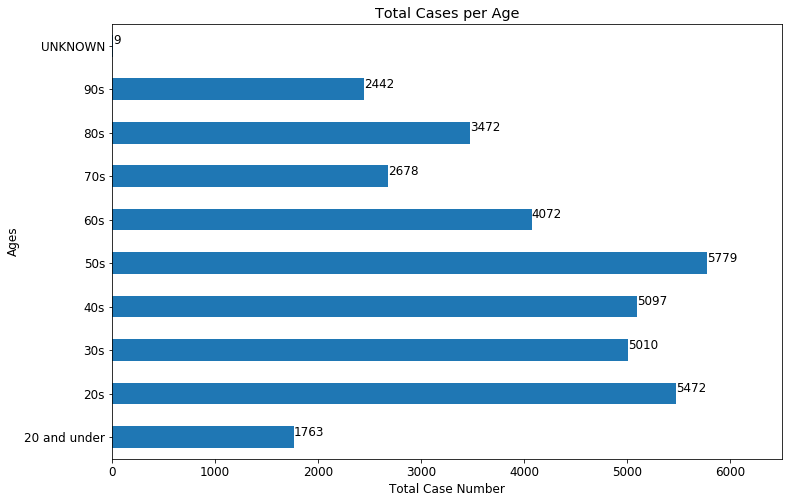

In [121]:
data_age = data_rename.copy()
data_age['Age'][data_age['Age'] == '<20']="20 and under"


age_series = data_age['Age'].value_counts().sort_index()


x_values = age_series.index.tolist()
y_values = age_series.values.tolist()


# Plot the figure.
plt.figure(figsize=(12, 8))
ax = age_series.plot(kind='barh', stacked=True)
ax.set_title('Total Cases per Age')
ax.set_xlabel('Total Case Number')
ax.set_ylabel('Ages')
ax.set_yticklabels(x_values)
ax.set_xlim(0,6500)
# ax.set_xticklabels(x_values)


def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label below bar
        if x_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            ha = 'right'

        # Use Y value as label and format number with one decimal place
        label = ("{:.0f}".format(x_value))

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Horizontally center label
            ha=ha)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.savefig('images/Total Cases per Age.png')
plt.show()

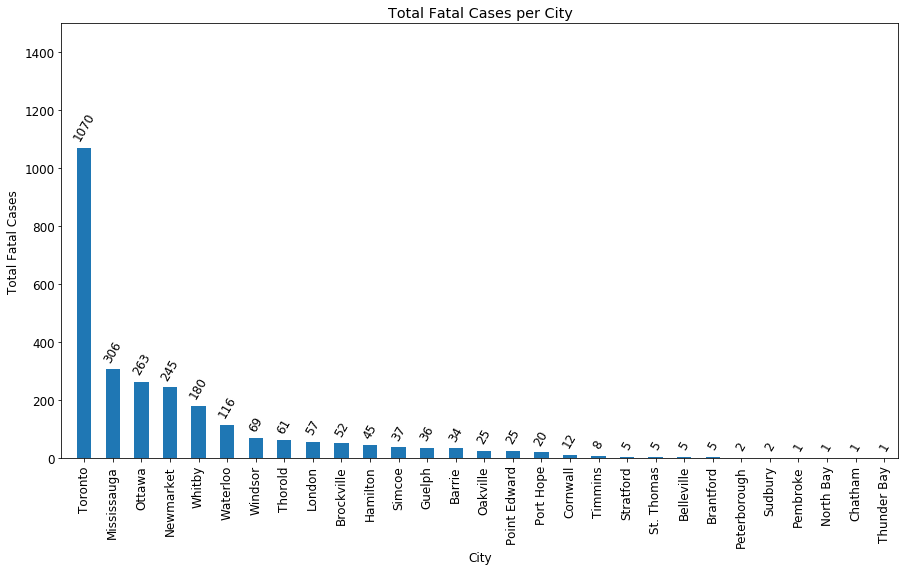

In [145]:
#bar graph for city vs total cases
data_fatal = data_rename.copy()
data_fatal_city = data_fatal[data_fatal['Outcome']=="Fatal"]
city_plot = data_fatal_city['City'].value_counts()


x_values = city_plot.index.tolist()
y_values = city_plot.values.tolist()

city_series = data_fatal_city['City'].value_counts()

# Plot the figure.
plt.figure(figsize=(15, 8))
ax = city_series.plot(kind='bar')
ax.set_title('Total Fatal Cases per City')
ax.set_xlabel('City')
ax.set_ylabel('Total Fatal Cases')
ax.set_xlim(-0.8)
ax.set_ylim(0, 1500)
ax.set_xticklabels(x_values)


def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = y_value

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, rotation=60)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("resources/Total Fatal Cases per City")

/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



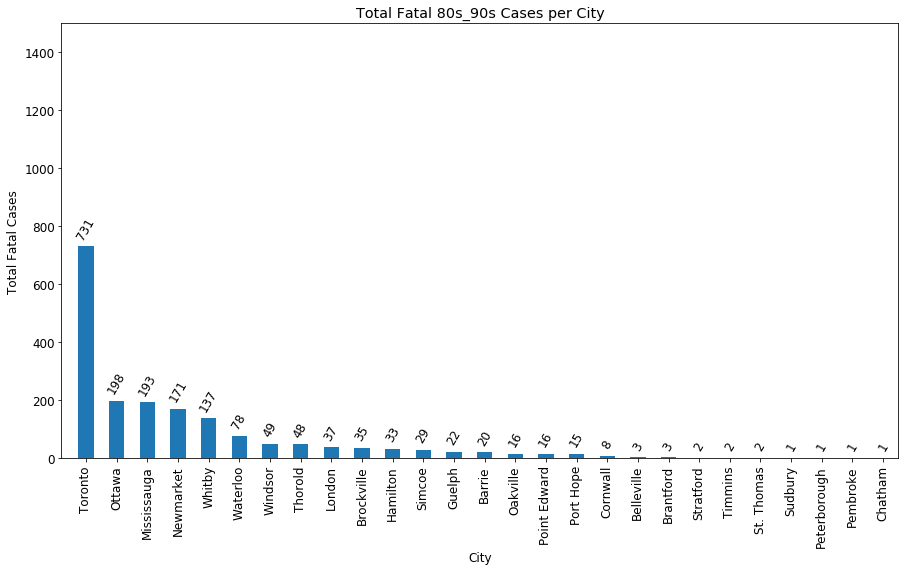

In [146]:
#bar graph for city vs total cases
data_fatal = data_rename.copy()
data_fatal_city = data_fatal[data_fatal['Outcome']=="Fatal"]

data_fatal_old = data_fatal_city[(data_fatal['Age']=="80s") | (data_fatal['Age']=="90s")]


city_plot = data_fatal_old['City'].value_counts()


x_values = city_plot.index.tolist()
y_values = city_plot.values.tolist()

city_series = data_fatal_old['City'].value_counts()

# Plot the figure.
plt.figure(figsize=(15, 8))
ax = city_series.plot(kind='bar')
ax.set_title('Total Fatal 80s_90s Cases per City')
ax.set_xlabel('City')
ax.set_ylabel('Total Fatal Cases')
ax.set_xlim(-0.8)
ax.set_ylim(0, 1500)
ax.set_xticklabels(x_values)


def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = y_value

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, rotation=60)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("resources/Total Fatal 80s_90s Cases per City")

In [26]:
#total cases per contraction type
data_rename['Virus Acquired'].value_counts()

OB                 14239
CC                 10769
No Epi-link         6637
Travel              1757
No Info-Unk         1289
No Info-Missing     1103
Name: Virus Acquired, dtype: int64

In [27]:
#merge no info-missing and no info-unk as one value
data_rename["Virus Acquired"].replace({"No Info-Missing": "No Info-Unk"}, inplace=True)

In [28]:
#updated series, No Info-Missing 1514 + No Info-Unk 1397=2911
data_rename['Virus Acquired'].value_counts()

OB             14239
CC             10769
No Epi-link     6637
No Info-Unk     2392
Travel          1757
Name: Virus Acquired, dtype: int64

In [29]:
#virus dataframe renamed and cleaned
virus_df = pd.DataFrame(data_rename['Virus Acquired'].value_counts())
virus_df = virus_df.reset_index()
virus_df.replace({'index': r"OB"}, {'index': "Outbreak"}, regex=True, inplace = True)
virus_df.replace({'index': r"CC"}, {'index': "Close Contact"}, regex=True, inplace = True)
virus_df.replace({'index': r"No Epi-link"}, {'index': "Non-Epidemic Link"}, regex=True, inplace = True)
virus_df.replace({'index': r"No Info-Unk"}, {'index': "Unknown"}, regex=True, inplace = True)
virus_df

index  Virus Acquired
0           Outbreak           14239
1      Close Contact           10769
2  Non-Epidemic Link            6637
3            Unknown            2392
4             Travel            1757

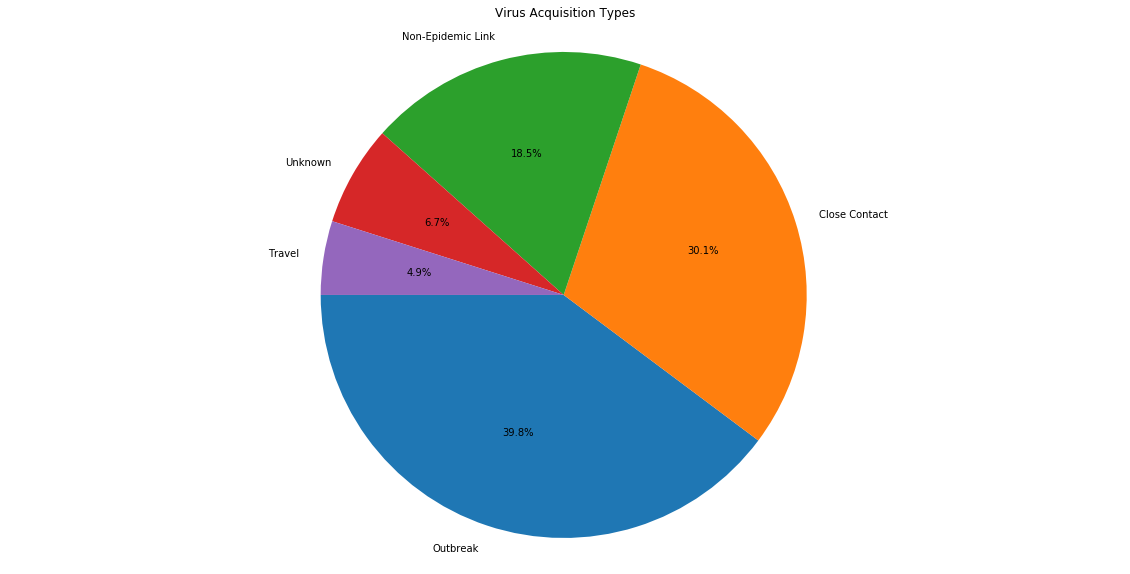

In [30]:
#pie graph for virus acquisition types
plt.figure(figsize = (20, 10))
plt.pie(virus_df["Virus Acquired"], labels=list(virus_df["index"]), autopct="%1.1f%%", startangle=180)
plt.title("Virus Acquisition Types")
plt.axis("equal")
plt.savefig('images/Virus Acquisition Types.png')
plt.show()

In [31]:
data_rename['Outcome'].value_counts()

Resolved        31266
Fatal            2689
Not Resolved     1839
Name: Outcome, dtype: int64

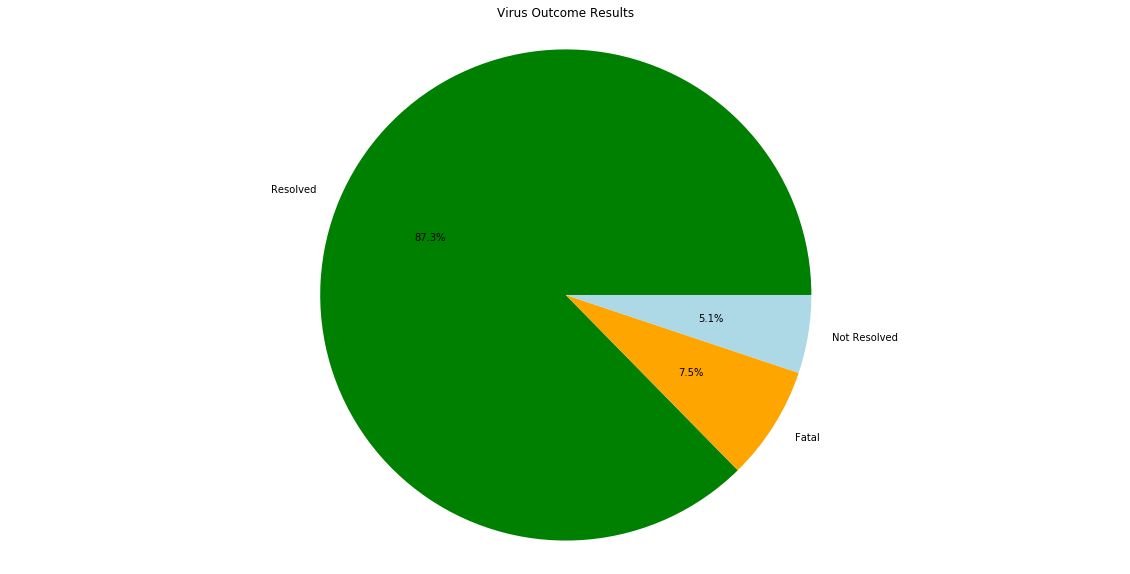

In [32]:
#pie chart for virus outcome results
outcome_pie = data_rename['Outcome'].value_counts()
colors = ["green", "orange","lightblue"]
outcome_pie.plot(kind = "pie", autopct="%1.1f%%", label = "",figsize = (20, 10), colors = colors )
plt.title("Virus Outcome Results")
plt.axis("equal")
plt.savefig('images/Virus Outcome Results.png')
plt.show()

In [33]:
a = data_rename['Outcome'].value_counts().values.tolist()
b = data_rename['Outcome'].value_counts().index.tolist()

c_list = []

c = list(zip(b,a))
for d, e in c:
    c_list.extend([d, e])
c_list # update desc when you upload the latest csv

['Resolved', 31266, 'Fatal', 2689, 'Not Resolved', 1839]

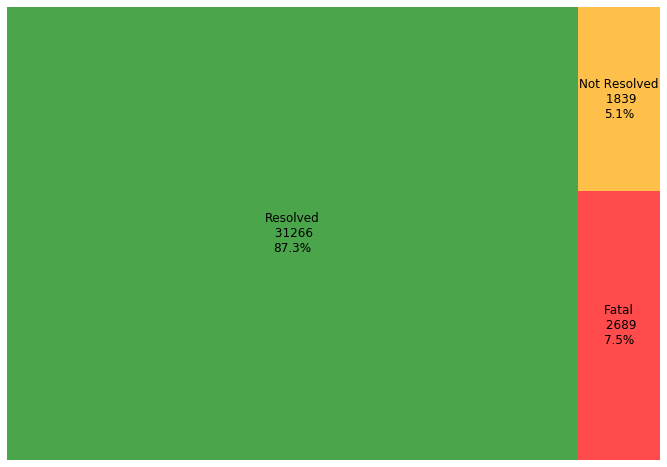

In [112]:
outcome_pie = data_rename['Outcome'].value_counts()

x = outcome_pie.values.tolist()
y = outcome_pie.index.tolist()


desc = f'{c_list[0]}\n {c_list[1]}', f'{c_list[2]}\n {c_list[3]}', f'{c_list[4]}\n {c_list[5]}' # update desc when you upload the latest csv


color_list = ['green', 'red', 'orange']

plt.rc('font', size=12)
plt.figure(figsize=(10,7))

outcome = data_rename['Outcome'].value_counts().values.sum()

perc = [str('{:.1f}'.format(i/outcome*100)) + "%" for i in data_rename['Outcome'].value_counts().values.tolist()]
        
labels = [el[0] + "\n" + el[1] for el in zip(desc, perc)]


squarify.plot(sizes=x, label=labels,
              color=color_list, alpha=0.7)
plt.tight_layout()
plt.axis('off')

plt.savefig('images/Resolved vs Fatal Tree map.png')
plt.show()

In [114]:
import plotly.express as px
data_tree = data_rename.copy()
data_tree["All Cases"] = 1
fig = px.treemap(data_tree, path=['All Cases', 'Outcome', 'Age', 'Gender'], values='All Cases', color='Age',
                color_discrete_map={'FEMALE':'gold', 'MALE':'darkblue'})
plt.savefig('images/Resolved vs Fatal Tree map-Interactive.png')
fig.show()

<Figure size 432x288 with 0 Axes>

In [36]:
#gender mortality rate
male_female_df = data_rename[(data_rename["Gender"] == "MALE") | (data_rename["Gender"] == "FEMALE")]
male_female_df.head()

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-03-08  40s  FEMALE         Travel  Resolved   
1         2020-03-11  60s  FEMALE             CC  Resolved   
2         2020-03-11  20s  FEMALE         Travel  Resolved   
3         2020-03-10  50s    MALE         Travel  Resolved   
4         2020-03-11  <20  FEMALE         Travel  Resolved   

                          Hospital      City Hospital Postal Code  \
0             Ottawa Public Health    Ottawa              K2G 6J8   
1   Sudbury & District Health Unit   Sudbury              P3E 3A3   
2            Toronto Public Health   Toronto              M5B 1W2   
3  Hamilton Public Health Services  Hamilton              L8P 4S6   
4            Toronto Public Health   Toronto              M5B 1W2   

   Hospital Latitude  Hospital Longitude Month  
0          45.345665          -75.763912    03  
1          46.466092          -80.998059    03  
2          43.656591          -79.379358    03  
3          43.257631          -79.871341    03  
4          43.656591          -79.379358    03

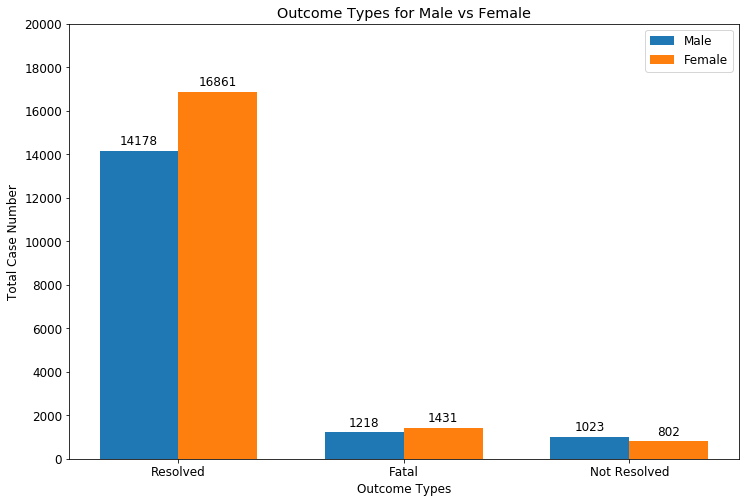

In [37]:
#Outcome Types for Male vs Female bar graph
outcome_df = virus_acq = male_female_df["Outcome"].value_counts().index
dataset = male_female_df.groupby("Gender")["Outcome"].value_counts()
male = dataset["MALE"]
female = dataset["FEMALE"]
index = np.arange(len(virus_acq))
number = np.arange(0, (dataset.max() + 4000), 2000)
bar_width = 0.35
# Plot the figure.
fig, ax = plt.subplots()
barMale = ax.bar(index - bar_width/2, male, bar_width, label="Male")
barFemale = ax.bar(index + bar_width/2, female, bar_width, label="Female")
# inserting x-axis label
ax.set_xticks(index)
ax.set_xticklabels(virus_acq)
# inserting y-axis label
ax.set_yticks(number)
ax.set_yticklabels(number)
# inserting bar chart axis labels
ax.set_xlabel("Outcome Types")
ax.set_ylabel("Total Case Number")
ax.set_title("Outcome Types for Male vs Female")
# inserting legend
ax.legend()
# Creating a function to label the bars in the plot
def insert_bar_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate("{:.0f}".format(bar.get_height()),
                   xy=(bar.get_x() + bar.get_width()/2, bar_height),
                   xytext=(0,3),
                   textcoords="offset points",
                   ha="center",
                   va='bottom',
                   rotation=0)
# Call the function above.
insert_bar_labels(barMale)
insert_bar_labels(barFemale)
# setting the figure size
fig.set_figheight(8)
fig.set_figwidth(12)
# showing the bar graph
plt.savefig('images/Outcome Types for Male vs Female.png')
plt.show()

In [38]:
#gender virus acquired fix
male_female_df.replace({'Virus Acquired': r"OB"}, {'Virus Acquired': "Outbreak"}, regex=True, inplace = True)
male_female_df.replace({'Virus Acquired': r"CC"}, {'Virus Acquired': "Close Contact"}, regex=True, inplace = True)
male_female_df.replace({'Virus Acquired': r"No Epi-link"}, {'Virus Acquired': "Non-Epidemic Link"}, regex=True, inplace = True)
male_female_df.replace({'Virus Acquired': r"No Info-Unk"}, {'Virus Acquired': "Unknown"}, regex=True, inplace = True)

/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6666: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



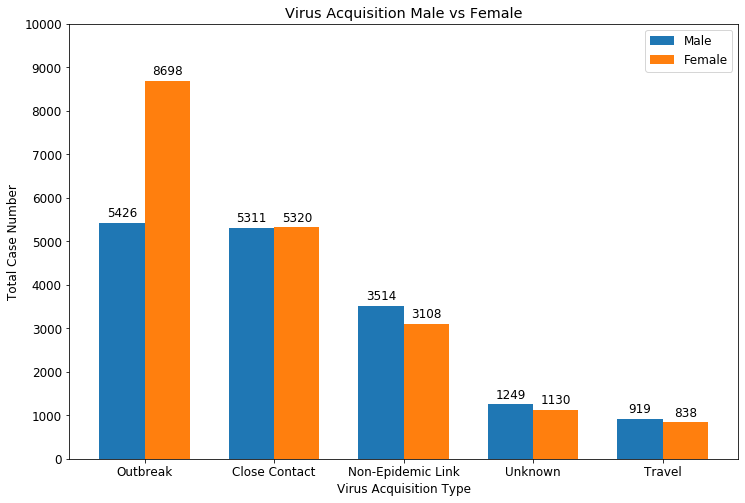

In [39]:
# virus acquisition male vs female bar graph
virus_acq = virus_acq = male_female_df['Virus Acquired'].value_counts().index
dataset = male_female_df.groupby('Gender')['Virus Acquired'].value_counts()
male = dataset['MALE']
female = dataset['FEMALE']
index = np.arange(len(virus_acq))
number = np.arange(0, (dataset.max() + 2000), 1000)
bar_width = 0.35
# Plot the figure.
fig, ax = plt.subplots()
barMale = ax.bar(index - bar_width/2, male, bar_width, label='Male')
barFemale = ax.bar(index + bar_width/2, female, bar_width, label='Female')
# inserting x-axis label
ax.set_xticks(index)
ax.set_xticklabels(virus_acq, rotation=0)
# inserting y-axis label
ax.set_yticks(number)
ax.set_yticklabels(number)
# inserting bar chart axis labels
ax.set_xlabel('Virus Acquisition Type')
ax.set_ylabel('Total Case Number')
ax.set_title('Virus Acquisition Male vs Female')
# inserting legend
ax.legend()
# Creating a function to label the bars in the plot
def insert_bar_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{:.0f}'.format(bar.get_height()),
                   xy=(bar.get_x() + bar.get_width()/2, bar_height),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha='center',
                   va='bottom',
                   rotation=0)
# Call the function above.
insert_bar_labels(barMale)
insert_bar_labels(barFemale)
# setting the figure size
fig.set_figheight(8)
fig.set_figwidth(12)
# showing the bar graph
plt.savefig('images/Virus Acquisition Male vs Female.png')
plt.show()

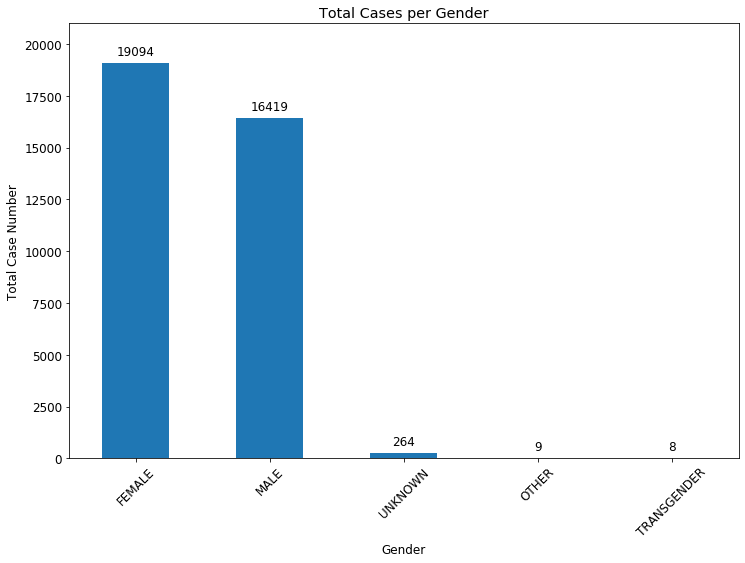

In [40]:
gender_series = data_rename['Gender'].value_counts()

x_values = gender_series.index.tolist()
y_values = gender_series.values.tolist()



# Plot the figure.
plt.figure(figsize=(12, 8))
ax = gender_series.plot(kind='bar', rot=45)
ax.set_title('Total Cases per Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Total Case Number')
ax.set_ylim(0, 21000)
ax.set_xticklabels(x_values)


def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = y_value

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.savefig('images/Total Cases per Gender.png')
plt.show()

In [41]:
#line graph dataframe for months vs total cases reported
line_data_df = pd.DataFrame(data_rename['Case Reported Date'].value_counts())
line_data_df = line_data_df.reset_index()
line_data_df = line_data_df.sort_values(["index"],ascending = True)
line_data_df.head()

index  Case Reported Date
124  2020-01-23                   2
132  2020-01-24                   1
131  2020-02-21                   1
130  2020-02-25                   1
129  2020-02-26                   1

In [42]:
#renaming line graph dataframe for months vs total cases reported
line_data_df[["Year", "Month", "Day"]] = line_data_df["index"].str.split("-", expand=True)
del line_data_df["Year"]
del line_data_df["Day"]
del line_data_df["index"]
line_data_df.head()

Case Reported Date Month
124                   2    01
132                   1    01
131                   1    02
130                   1    02
129                   1    02

In [43]:
#renaming graph dataframe for months vs total cases reported
line_data_df["Month"][line_data_df["Month"] == "01"]="January"
line_data_df["Month"][line_data_df["Month"] == "02"]="February"
line_data_df["Month"][line_data_df["Month"] == "03"]="March"
line_data_df["Month"][line_data_df["Month"] == "04"]="April"
line_data_df["Month"][line_data_df["Month"] == "05"]="May"
line_data_df["Month"][line_data_df["Month"] == "06"]="June"
line_data_df.rename(columns={'Case Reported Date': 'Total Cases Reported'}, inplace=True)
line_data_df.head()

/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dayothompson/opt/anaconda3/lib/py

Total Cases Reported     Month
124                     2   January
132                     1   January
131                     1  February
130                     1  February
129                     1  February

In [44]:
#line graph dataframe 
line_data_df.head()

Total Cases Reported     Month
124                     2   January
132                     1   January
131                     1  February
130                     1  February
129                     1  February

In [45]:
#looping through months for total count
def month_count(month):
    for i in line_data_df["Month"]:
        month_df = line_data_df[line_data_df["Month"]==month].sum()
    #jan_df  
    month_df_total = pd.DataFrame(month_df)
    #jan_df_total
    return(month_df_total.iloc[0,0])

jan_count = month_count("January")
feb_count = month_count("February")
mar_count = month_count("March")
apr_count = month_count("April")
may_count = month_count("May")
jun_count = month_count("June")

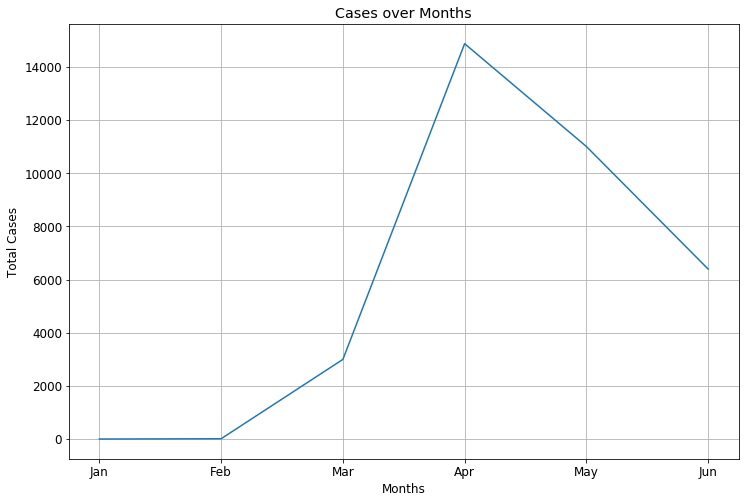

In [46]:
#plotting line graph
month_list = [jan_count, feb_count, mar_count, apr_count, may_count, jun_count]
month_list_2 = ["Jan","Feb","Mar","Apr","May","Jun"]
x = month_list_2
y = month_list
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(x, y)
plt.title("Cases over Months")
plt.xlabel("Months")
plt.ylabel("Total Cases")
plt.savefig('images/Cases over Months.png')
plt.show()

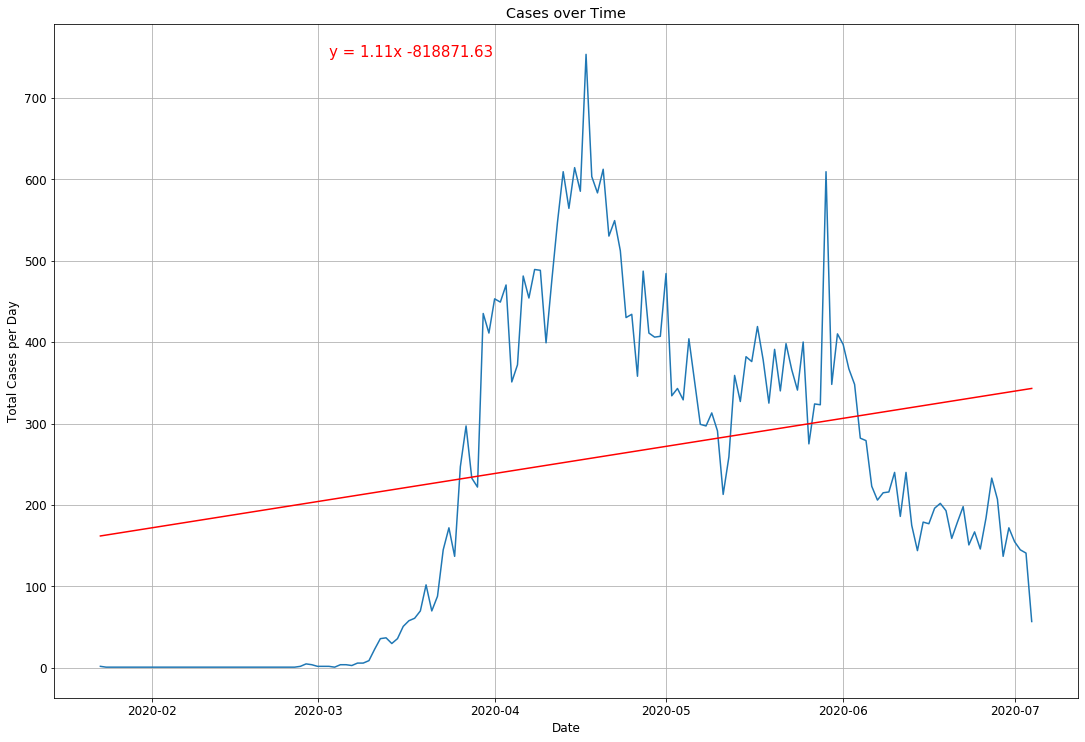

In [47]:
x_values = pd.to_datetime(data_rename['Case Reported Date'].value_counts().index).sort_values()
y_values = data_rename['Case Reported Date'].value_counts().sort_index()

x = pd.to_datetime(data_rename['Case Reported Date'].value_counts().sort_index().index).map(dt.datetime.toordinal)

plt.figure(figsize=(15,10))
plt.plot(x_values,y_values)
plt.tight_layout()
plt.grid()
plt.title("Cases over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases per Day")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_values)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (737487,750), color="red", fontsize=15)
plt.savefig('images/Cases over Time.png')
plt.show()

In [48]:
data_rename_age = data_rename.copy()
data_rename_age.head()

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-03-08  40s  FEMALE         Travel  Resolved   
1         2020-03-11  60s  FEMALE             CC  Resolved   
2         2020-03-11  20s  FEMALE         Travel  Resolved   
3         2020-03-10  50s    MALE         Travel  Resolved   
4         2020-03-11  <20  FEMALE         Travel  Resolved   

                          Hospital      City Hospital Postal Code  \
0             Ottawa Public Health    Ottawa              K2G 6J8   
1   Sudbury & District Health Unit   Sudbury              P3E 3A3   
2            Toronto Public Health   Toronto              M5B 1W2   
3  Hamilton Public Health Services  Hamilton              L8P 4S6   
4            Toronto Public Health   Toronto              M5B 1W2   

   Hospital Latitude  Hospital Longitude Month  
0          45.345665          -75.763912    03  
1          46.466092          -80.998059    03  
2          43.656591          -79.379358    03  
3          43.257631          -79.871341    03  
4          43.656591          -79.379358    03

In [49]:
data_rename_age[['Year', 'Month', 'Day']] = data_rename['Case Reported Date'].str.split("-", expand=True)
del data_rename_age['Year']
del data_rename_age['Day']
del data_rename_age['Case Reported Date']

In [50]:
data_rename_age.head()

Age  Gender Virus Acquired   Outcome                         Hospital  \
0  40s  FEMALE         Travel  Resolved             Ottawa Public Health   
1  60s  FEMALE             CC  Resolved   Sudbury & District Health Unit   
2  20s  FEMALE         Travel  Resolved            Toronto Public Health   
3  50s    MALE         Travel  Resolved  Hamilton Public Health Services   
4  <20  FEMALE         Travel  Resolved            Toronto Public Health   

       City Hospital Postal Code  Hospital Latitude  Hospital Longitude Month  
0    Ottawa              K2G 6J8          45.345665          -75.763912    03  
1   Sudbury              P3E 3A3          46.466092          -80.998059    03  
2   Toronto              M5B 1W2          43.656591          -79.379358    03  
3  Hamilton              L8P 4S6          43.257631          -79.871341    03  
4   Toronto              M5B 1W2          43.656591          -79.379358    03

In [51]:
jan = data_rename_age[data_rename_age['Month']== '01']
feb = data_rename_age[data_rename_age['Month']=='02']
mar = data_rename_age[data_rename_age['Month']=='03']
apr = data_rename_age[data_rename_age['Month']=='04']
may = data_rename_age[data_rename_age['Month']=='05']
jun = data_rename_age[data_rename_age['Month']=='06']

In [52]:
jan

Age  Gender Virus Acquired   Outcome                      Hospital  \
115  50s  FEMALE         Travel  Resolved         Toronto Public Health   
116  50s    MALE         Travel  Resolved         Toronto Public Health   
117  20s  FEMALE         Travel  Resolved  Middlesex-London Health Unit   

        City Hospital Postal Code  Hospital Latitude  Hospital Longitude Month  
115  Toronto              M5B 1W2          43.656591          -79.379358    01  
116  Toronto              M5B 1W2          43.656591          -79.379358    01  
117   London              N6A 5L7          42.981468          -81.254016    01

In [53]:
new_df = mar.groupby(by = ["City"]).count()

In [54]:
loc_coord = mar[["City", "Hospital Latitude", "Hospital Longitude"]].drop_duplicates()

In [55]:
final_df = new_df.merge(loc_coord, how='inner', on = 'City')[["Month", "Hospital Latitude_y", "Hospital Longitude_y"]]

final_df.rename(columns={"Month": "Cases"
                        , "Hospital Latitude_y" : "Hospital Latitude"
                        , "Hospital Longitude_y": "Hospital Longitude"}, inplace = True)

In [56]:
final_df.head()

Cases  Hospital Latitude  Hospital Longitude
0     52          44.410713          -79.686306
1     15          44.186674          -77.391446
2     18          43.151811          -80.274374
3     34          44.615843          -75.702833
4      8          42.403861          -82.208561

In [104]:
#  Access maps with unique API key
gmaps.configure(api_key=api_key)

# Create an empty list to store the locations
locations = []

for index, row in final_df.iterrows():
    lat = row["Hospital Latitude"]
    lng = row["Hospital Longitude"]
    locations.extend([(lat, lng)])
    
# To use humidity as the weight    
weight= final_df['Cases']

# Add Heatmap layer to map
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=weight, max_intensity=50)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [105]:
def month_name(a):
    new_df = a.groupby(by = ["City"]).count()
    loc_coord = a[["City", "Hospital Latitude", "Hospital Longitude"]].drop_duplicates()
    final_df = new_df.merge(loc_coord, how='inner', on = 'City')[["Month", "Hospital Latitude_y", "Hospital Longitude_y"]]

    final_df.rename(columns={"Month": "Cases"
                        , "Hospital Latitude_y" : "Hospital Latitude"
                        , "Hospital Longitude_y": "Hospital Longitude"}, inplace = True)
    
    locations = []

    for index, row in final_df.iterrows():
        lat = row["Hospital Latitude"]
        lng = row["Hospital Longitude"]
        locations.extend([(lat, lng)])
    
# To use humidity as the weight    
    weight = final_df['Cases']

# Add Heatmap layer to map
    fig = gmaps.figure()

    heat_layer = gmaps.heatmap_layer(locations, weights = weight, max_intensity=50)

    fig.add_layer(heat_layer)
    return fig

In [116]:
month_name(jan)

Figure(layout=FigureLayout(height='420px'))

In [117]:
month_name(feb)

Figure(layout=FigureLayout(height='420px'))

In [118]:
month_name(mar)

Figure(layout=FigureLayout(height='420px'))

In [119]:
month_name(apr)

Figure(layout=FigureLayout(height='420px'))

In [110]:
month_name(may)

Figure(layout=FigureLayout(height='420px'))

In [111]:
month_name(jun)

Figure(layout=FigureLayout(height='420px'))

In [65]:
toronto_jan = pd.read_csv("resources/toronto_jan.csv")
toronto_jan.head()

Case Reported Date  Temp Max (F)  Temp Avg (F)  Temp Min (F)  Humidity Max  \
0         2020-01-01            32          30.0           NaN            81   
1         2020-01-02            41          38.5          34.0            93   
2         2020-01-03            45          41.4          37.0           100   
3         2020-01-04            39          34.6          32.0           100   
4         2020-01-05            36          33.0          30.0           100   

   Humidity Avg  Humidity Min  Wind Speed Max (mph)  Wind Speed Avg (mph)  \
0          72.9            60                    24                  18.9   
1          80.5            70                    20                  13.6   
2          80.7            65                    16                   8.4   
3          84.5            65                    18                   7.7   
4          81.8            60                    23                  12.6   

   Wind Speed Min (mph)  
0                     9  
1                     6  
2                     5  
3                     2  
4                     3

In [66]:
data_rename.head()

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-03-08  40s  FEMALE         Travel  Resolved   
1         2020-03-11  60s  FEMALE             CC  Resolved   
2         2020-03-11  20s  FEMALE         Travel  Resolved   
3         2020-03-10  50s    MALE         Travel  Resolved   
4         2020-03-11  <20  FEMALE         Travel  Resolved   

                          Hospital      City Hospital Postal Code  \
0             Ottawa Public Health    Ottawa              K2G 6J8   
1   Sudbury & District Health Unit   Sudbury              P3E 3A3   
2            Toronto Public Health   Toronto              M5B 1W2   
3  Hamilton Public Health Services  Hamilton              L8P 4S6   
4            Toronto Public Health   Toronto              M5B 1W2   

   Hospital Latitude  Hospital Longitude Month  
0          45.345665          -75.763912    03  
1          46.466092          -80.998059    03  
2          43.656591          -79.379358    03  
3          43.257631          -79.871341    03  
4          43.656591          -79.379358    03

In [67]:
data_jan_df = data_rename[(data_rename["Month"] == "01") & (data_rename["City"] == "Toronto")]
data_jan_df

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
115         2020-01-23  50s  FEMALE         Travel  Resolved   
116         2020-01-23  50s    MALE         Travel  Resolved   

                  Hospital     City Hospital Postal Code  Hospital Latitude  \
115  Toronto Public Health  Toronto              M5B 1W2          43.656591   
116  Toronto Public Health  Toronto              M5B 1W2          43.656591   

     Hospital Longitude Month  
115          -79.379358    01  
116          -79.379358    01

In [68]:
toronto_jan_merged = pd.merge(data_jan_df, toronto_jan, on = "Case Reported Date", how = "inner")
toronto_jan_merged

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-01-23  50s  FEMALE         Travel  Resolved   
1         2020-01-23  50s    MALE         Travel  Resolved   

                Hospital     City Hospital Postal Code  Hospital Latitude  \
0  Toronto Public Health  Toronto              M5B 1W2          43.656591   
1  Toronto Public Health  Toronto              M5B 1W2          43.656591   

   Hospital Longitude Month  Temp Max (F)  Temp Avg (F)  Temp Min (F)  \
0          -79.379358    01            36          32.4          28.0   
1          -79.379358    01            36          32.4          28.0   

   Humidity Max  Humidity Avg  Humidity Min  Wind Speed Max (mph)  \
0            93          76.9            69                    13   
1            93          76.9            69                    13   

   Wind Speed Avg (mph)  Wind Speed Min (mph)  
0                   5.3                     0  
1                   5.3                     0

In [69]:
toronto_feb = pd.read_csv("resources/toronto_feb.csv")
data_feb_df = data_rename[(data_rename["Month"] == "02") & (data_rename["City"] == "Toronto")]
toronto_feb_merged = pd.merge(data_feb_df, toronto_feb, on = "Case Reported Date", how = "inner")
toronto_feb_merged.head()

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-02-21  20s  FEMALE         Travel  Resolved   
1         2020-02-25  60s  FEMALE         Travel  Resolved   
2         2020-02-26  60s    MALE         Travel  Resolved   
3         2020-02-27  50s    MALE         Travel  Resolved   
4         2020-02-28  80s    MALE         Travel  Resolved   

                Hospital     City Hospital Postal Code  Hospital Latitude  \
0  Toronto Public Health  Toronto              M5B 1W2          43.656591   
1  Toronto Public Health  Toronto              M5B 1W2          43.656591   
2  Toronto Public Health  Toronto              M5B 1W2          43.656591   
3  Toronto Public Health  Toronto              M5B 1W2          43.656591   
4  Toronto Public Health  Toronto              M5B 1W2          43.656591   

   Hospital Longitude Month  Temp Max (F)  Temp Avg (F)  Temp Min (F)  \
0          -79.379358    02            34          25.6            18   
1          -79.379358    02            43          38.7            36   
2          -79.379358    02            39          32.7            27   
3          -79.379358    02            28          25.9            23   
4          -79.379358    02            27          23.9            19   

   Humidity Max  Humidity Avg  Humidity Min  Wind Speed Max (mph)  \
0            74          62.0            44                    28   
1            93          74.3            53                    14   
2            93          83.5            52                    16   
3            93          71.4            59                    43   
4            86          72.4            64                    36   

   Wind Speed Avg (mph)  Wind Speed Min (mph)  
0                  19.3                    10  
1                   9.8                     6  
2                  11.1                     6  
3                  28.5                    14  
4                  23.7                     8

In [70]:
toronto_mar = pd.read_csv("resources/toronto_mar.csv")
data_mar_df = data_rename[(data_rename["Month"] == "03") & (data_rename["City"] == "Toronto")]
toronto_mar_merged = pd.merge(data_mar_df, toronto_mar, on = "Case Reported Date", how = "inner")
toronto_mar_merged.head()

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-03-11  20s  FEMALE         Travel  Resolved   
1         2020-03-11  <20  FEMALE         Travel  Resolved   
2         2020-03-11  20s    MALE         Travel  Resolved   
3         2020-03-11  60s    MALE         Travel  Resolved   
4         2020-03-11  70s  FEMALE         Travel  Resolved   

                Hospital     City Hospital Postal Code  Hospital Latitude  \
0  Toronto Public Health  Toronto              M5B 1W2          43.656591   
1  Toronto Public Health  Toronto              M5B 1W2          43.656591   
2  Toronto Public Health  Toronto              M5B 1W2          43.656591   
3  Toronto Public Health  Toronto              M5B 1W2          43.656591   
4  Toronto Public Health  Toronto              M5B 1W2          43.656591   

   Hospital Longitude Month  Temp Max (F)  Temp Avg (F)  Temp Min (F)  \
0          -79.379358    03            37          34.1            28   
1          -79.379358    03            37          34.1            28   
2          -79.379358    03            37          34.1            28   
3          -79.379358    03            37          34.1            28   
4          -79.379358    03            37          34.1            28   

   Humidity Max  Humidity Avg  Humidity Min  Wind Speed Max (mph)  \
0            93          76.1            60                    21   
1            93          76.1            60                    21   
2            93          76.1            60                    21   
3            93          76.1            60                    21   
4            93          76.1            60                    21   

   Wind Speed Avg (mph)  Wind Speed Min (mph)  
0                  10.4                     0  
1                  10.4                     0  
2                  10.4                     0  
3                  10.4                     0  
4                  10.4                     0

In [71]:
toronto_apr = pd.read_csv("resources/toronto_apr.csv")
data_apr_df = data_rename[(data_rename["Month"] == "04") & (data_rename["City"] == "Toronto")]
toronto_apr_merged = pd.merge(data_apr_df, toronto_apr, on = "Case Reported Date", how = "inner")
toronto_apr_merged.head()

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-04-01  30s  FEMALE             CC  Resolved   
1         2020-04-01  60s  FEMALE             OB  Resolved   
2         2020-04-01  30s    MALE    No Epi-link  Resolved   
3         2020-04-01  30s    MALE             OB  Resolved   
4         2020-04-01  40s    MALE         Travel  Resolved   

                Hospital     City Hospital Postal Code  Hospital Latitude  \
0  Toronto Public Health  Toronto              M5B 1W2          43.656591   
1  Toronto Public Health  Toronto              M5B 1W2          43.656591   
2  Toronto Public Health  Toronto              M5B 1W2          43.656591   
3  Toronto Public Health  Toronto              M5B 1W2          43.656591   
4  Toronto Public Health  Toronto              M5B 1W2          43.656591   

   Hospital Longitude Month  Temp Max (F)  Temp Avg (F)  Temp Min (F)  \
0          -79.379358    04            48          42.2            39   
1          -79.379358    04            48          42.2            39   
2          -79.379358    04            48          42.2            39   
3          -79.379358    04            48          42.2            39   
4          -79.379358    04            48          42.2            39   

   Humidity Max  Humidity Avg  Humidity Min  Wind Speed Max (mph)  \
0            76          53.0            32                    15   
1            76          53.0            32                    15   
2            76          53.0            32                    15   
3            76          53.0            32                    15   
4            76          53.0            32                    15   

   Wind Speed Avg (mph)  Wind Speed Min (mph)  
0                   8.4                     3  
1                   8.4                     3  
2                   8.4                     3  
3                   8.4                     3  
4                   8.4                     3

In [72]:
toronto_may = pd.read_csv("resources/toronto_may.csv")
data_may_df = data_rename[(data_rename["Month"] == "05") & (data_rename["City"] == "Toronto")]
toronto_may_merged = pd.merge(data_may_df, toronto_may, on = "Case Reported Date", how = "inner")
toronto_may_merged.head()

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-05-06  60s    MALE             OB  Resolved   
1         2020-05-06  80s  FEMALE             OB  Resolved   
2         2020-05-06  70s  FEMALE             OB  Resolved   
3         2020-05-06  30s  FEMALE    No Epi-link  Resolved   
4         2020-05-06  90s  FEMALE             OB  Resolved   

                Hospital     City Hospital Postal Code  Hospital Latitude  \
0  Toronto Public Health  Toronto              M5B 1W2          43.656591   
1  Toronto Public Health  Toronto              M5B 1W2          43.656591   
2  Toronto Public Health  Toronto              M5B 1W2          43.656591   
3  Toronto Public Health  Toronto              M5B 1W2          43.656591   
4  Toronto Public Health  Toronto              M5B 1W2          43.656591   

   Hospital Longitude Month  Temp Max (F)  Temp Avg (F)  Temp Min (F)  \
0          -79.379358    05            50          45.5            41   
1          -79.379358    05            50          45.5            41   
2          -79.379358    05            50          45.5            41   
3          -79.379358    05            50          45.5            41   
4          -79.379358    05            50          45.5            41   

   Humidity Max  Humidity Avg  Humidity Min  Wind Speed Max (mph)  \
0            66          50.5            30                     9   
1            66          50.5            30                     9   
2            66          50.5            30                     9   
3            66          50.5            30                     9   
4            66          50.5            30                     9   

   Wind Speed Avg (mph)  Wind Speed Min (mph)  
0                   5.4                     0  
1                   5.4                     0  
2                   5.4                     0  
3                   5.4                     0  
4                   5.4                     0

In [73]:
toronto_jun = pd.read_csv("resources/toronto_jun.csv")
data_jun_df = data_rename[(data_rename["Month"] == "06") & (data_rename["City"] == "Toronto")]
toronto_jun_merged = pd.merge(data_jun_df, toronto_jun, on = "Case Reported Date", how = "inner")
toronto_jun_merged.head()

Case Reported Date  Age Gender Virus Acquired   Outcome  \
0         2020-06-03  <20   MALE    No Epi-link  Resolved   
1         2020-06-03  20s   MALE    No Epi-link  Resolved   
2         2020-06-03  20s   MALE    No Epi-link  Resolved   
3         2020-06-03  20s   MALE             CC  Resolved   
4         2020-06-03  80s   MALE             OB  Resolved   

                Hospital     City Hospital Postal Code  Hospital Latitude  \
0  Toronto Public Health  Toronto              M5B 1W2          43.656591   
1  Toronto Public Health  Toronto              M5B 1W2          43.656591   
2  Toronto Public Health  Toronto              M5B 1W2          43.656591   
3  Toronto Public Health  Toronto              M5B 1W2          43.656591   
4  Toronto Public Health  Toronto              M5B 1W2          43.656591   

   Hospital Longitude Month  Temp Max (F)  Temp Avg (F)  Temp Min (F)  \
0          -79.379358    06            82          61.4            54   
1          -79.379358    06            82          61.4            54   
2          -79.379358    06            82          61.4            54   
3          -79.379358    06            82          61.4            54   
4          -79.379358    06            82          61.4            54   

   Humidity Max  Humidity Avg  Humidity Min  Wind Speed Max (mph)  \
0           100          87.2            42                    21   
1           100          87.2            42                    21   
2           100          87.2            42                    21   
3           100          87.2            42                    21   
4           100          87.2            42                    21   

   Wind Speed Avg (mph)  Wind Speed Min (mph)  
0                   8.5                     0  
1                   8.5                     0  
2                   8.5                     0  
3                   8.5                     0  
4                   8.5                     0

In [74]:
# Define a function for regression
def line_regress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_values)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(15,8))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xticks(rotation=80)
    plt.annotate(line_eq, (0,37), color="red", fontsize=15)
    plt.title(title_ab)
    plt.xlabel(xlabel_ab)
    plt.ylabel(ylabel_ab)
    plt.tight_layout()
    plt.grid()
    plt.savefig(f'images/{title_ab}.png')
    return plt.show()

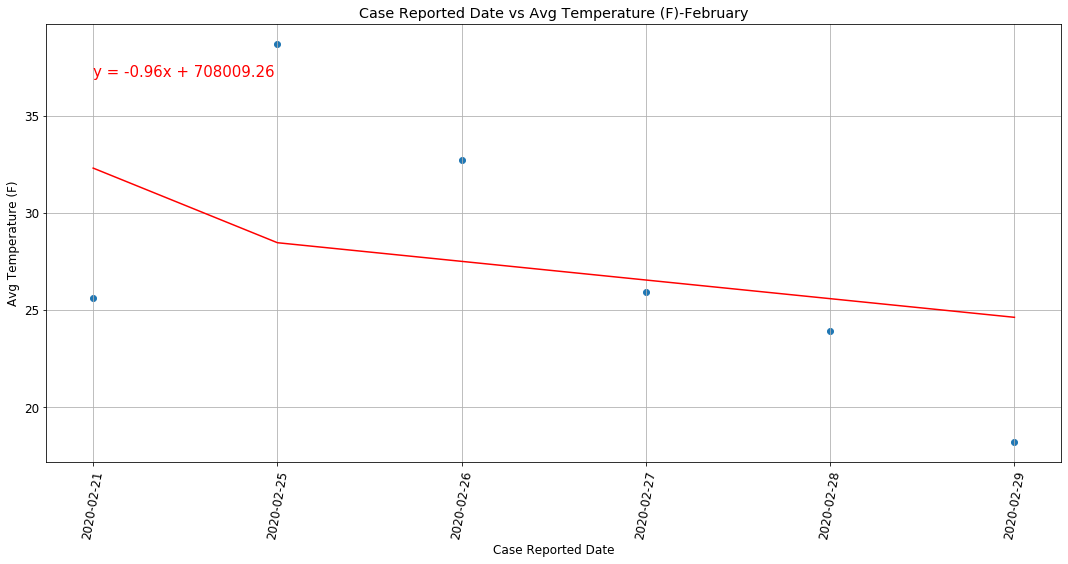

In [75]:
x = pd.to_datetime(toronto_feb_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_feb_merged["Case Reported Date"].sort_values()
y_values = toronto_feb_merged["Temp Avg (F)"]
title_ab = "Case Reported Date vs Avg Temperature (F)-February"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Temperature (F)"

line_regress(x_values, y_values)

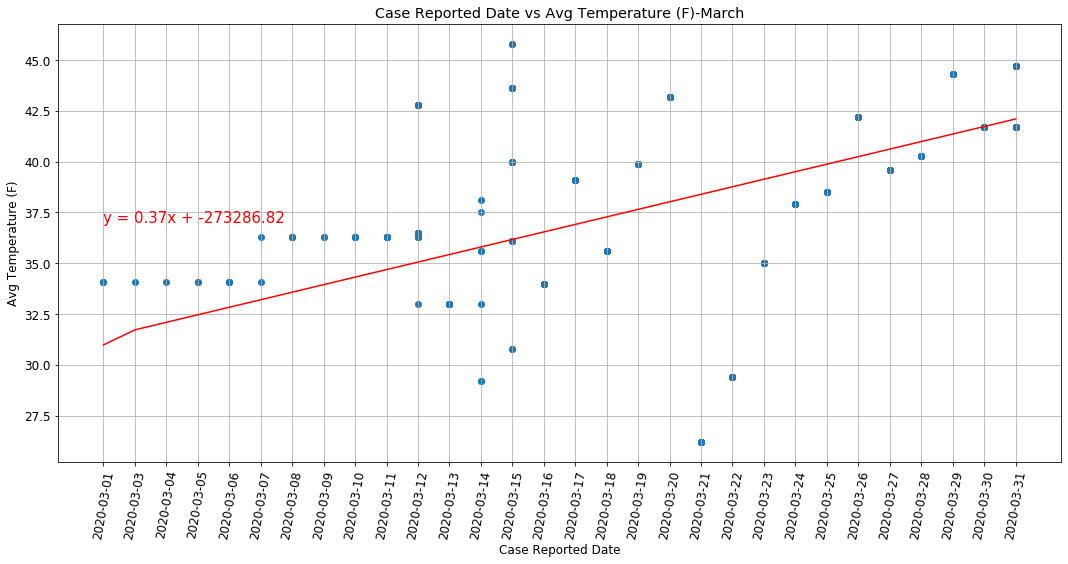

In [76]:
x = pd.to_datetime(toronto_mar_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_mar_merged["Case Reported Date"].sort_values()
y_values = toronto_mar_merged["Temp Avg (F)"]
title_ab = "Case Reported Date vs Avg Temperature (F)-March"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Temperature (F)"

line_regress(x_values, y_values)

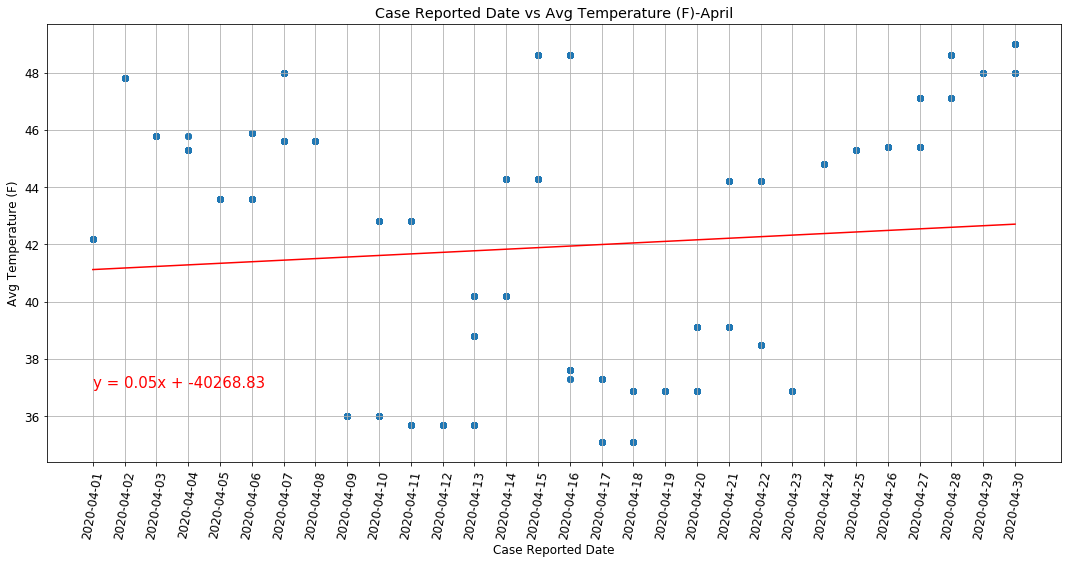

In [77]:
x = pd.to_datetime(toronto_apr_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_apr_merged["Case Reported Date"].sort_values().values
y_values = toronto_apr_merged["Temp Avg (F)"]
title_ab = "Case Reported Date vs Avg Temperature (F)-April"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Temperature (F)"

line_regress(x_values, y_values)

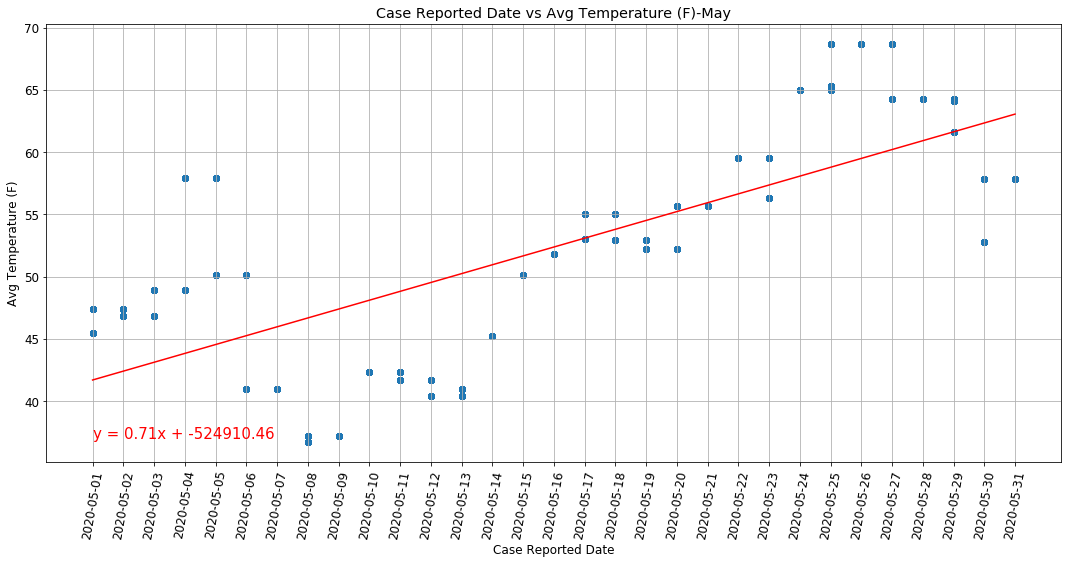

In [78]:
x = pd.to_datetime(toronto_may_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_may_merged["Case Reported Date"].sort_values()
y_values = toronto_may_merged["Temp Avg (F)"]
title_ab = "Case Reported Date vs Avg Temperature (F)-May"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Temperature (F)"

line_regress(x_values, y_values)

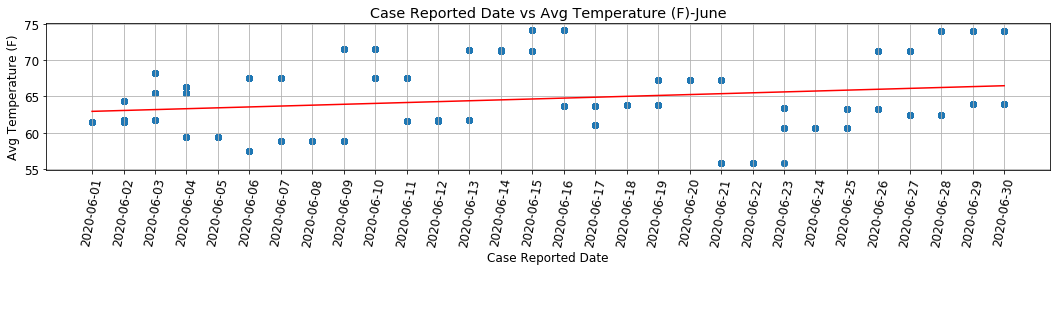

In [79]:
x = pd.to_datetime(toronto_jun_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_jun_merged["Case Reported Date"].sort_values().values
y_values = toronto_jun_merged["Temp Avg (F)"]
title_ab = "Case Reported Date vs Avg Temperature (F)-June"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Temperature (F)"

line_regress(x_values, y_values)

In [80]:
#toronto case numbers per month
total_rows_jan = len(toronto_jan_merged.index)
print(total_rows_jan)
total_rows_feb = len(toronto_feb_merged.index)
print(total_rows_feb)
total_rows_mar = len(toronto_mar_merged.index)
print(total_rows_mar)
total_rows_apr = len(toronto_apr_merged.index)
print(total_rows_apr)
total_rows_may = len(toronto_may_merged.index)
print(total_rows_may)
total_rows_jun = len(toronto_jun_merged.index)
print(total_rows_jun)

2
6
829
5112
4763
2482


In [81]:
#toronto avg temp per month
mean_temp_jan = toronto_jan_merged["Temp Avg (F)"].mean()
mean_temp_feb = toronto_feb_merged["Temp Avg (F)"].mean()
mean_temp_mar = toronto_mar_merged["Temp Avg (F)"].mean()
mean_temp_apr = toronto_apr_merged["Temp Avg (F)"].mean()
mean_temp_may = toronto_may_merged["Temp Avg (F)"].mean()
mean_temp_jun = toronto_jun_merged["Temp Avg (F)"].mean()

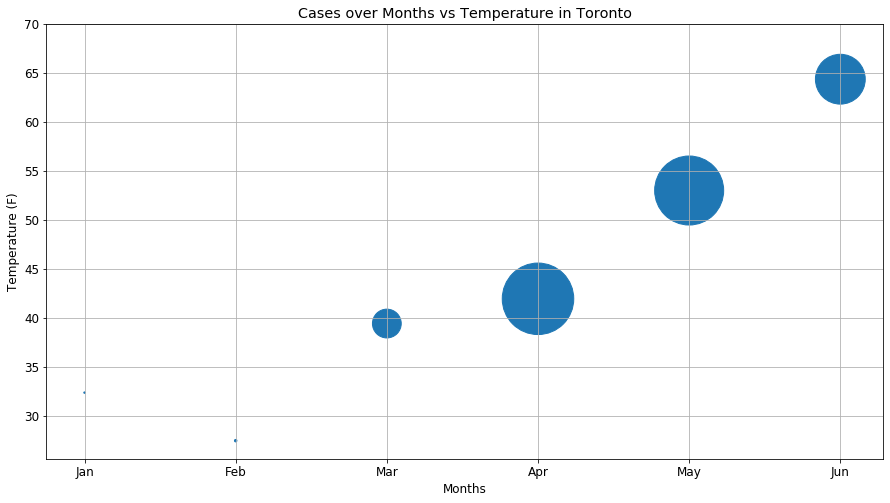

In [82]:
#plotting bubble graph
toronto_list = [total_rows_jan, total_rows_feb, total_rows_mar, total_rows_apr, total_rows_may, total_rows_jun]
toronto_list_2 = ["Jan","Feb","Mar","Apr","May","Jun"]
toronto_list_3 = [mean_temp_jan, mean_temp_feb, mean_temp_mar, mean_temp_apr, mean_temp_may, mean_temp_jun]
x = toronto_list_2
y = toronto_list_3
z = toronto_list
plt.figure(figsize=(15,8))
plt.grid()

# use the scatter function
plt.scatter(x, y, s=z*1000, alpha=1)
plt.title("Cases over Months vs Temperature in Toronto")
plt.xlabel("Months")
plt.ylabel("Temperature (F)")
plt.ylim(top=70)
plt.savefig('images/Cases over Months vs Temperature in Toronto.png')
plt.show()

#majority of data shows as the temperature increases over the months, bubble size (total cases per month) reduces
#In january and february, population was not reporting symptoms as virus was not classified as severe at that time.
#In March, virus was considered a pandemic and reported cases increased significantly, but was reducing in May and June

In [83]:
#if you can show that older people are more vulnerable to low temperature hence a high increase of COVID infection
#Plot Age x axis, and temperature y axis

In [84]:
vertical_stack = pd.concat([toronto_jan_merged, toronto_feb_merged, toronto_mar_merged,
                           toronto_apr_merged, toronto_may_merged, toronto_jun_merged], axis=0)
vertical_stack.head()

Case Reported Date  Age  Gender Virus Acquired   Outcome  \
0         2020-01-23  50s  FEMALE         Travel  Resolved   
1         2020-01-23  50s    MALE         Travel  Resolved   
0         2020-02-21  20s  FEMALE         Travel  Resolved   
1         2020-02-25  60s  FEMALE         Travel  Resolved   
2         2020-02-26  60s    MALE         Travel  Resolved   

                Hospital     City Hospital Postal Code  Hospital Latitude  \
0  Toronto Public Health  Toronto              M5B 1W2          43.656591   
1  Toronto Public Health  Toronto              M5B 1W2          43.656591   
0  Toronto Public Health  Toronto              M5B 1W2          43.656591   
1  Toronto Public Health  Toronto              M5B 1W2          43.656591   
2  Toronto Public Health  Toronto              M5B 1W2          43.656591   

   Hospital Longitude Month  Temp Max (F)  Temp Avg (F)  Temp Min (F)  \
0          -79.379358    01            36          32.4          28.0   
1          -79.379358    01            36          32.4          28.0   
0          -79.379358    02            34          25.6          18.0   
1          -79.379358    02            43          38.7          36.0   
2          -79.379358    02            39          32.7          27.0   

   Humidity Max  Humidity Avg  Humidity Min  Wind Speed Max (mph)  \
0            93          76.9            69                    13   
1            93          76.9            69                    13   
0            74          62.0            44                    28   
1            93          74.3            53                    14   
2            93          83.5            52                    16   

   Wind Speed Avg (mph)  Wind Speed Min (mph)  
0                   5.3                     0  
1                   5.3                     0  
0                  19.3                    10  
1                   9.8                     6  
2                  11.1                     6

In [85]:
ageunder20_count= vertical_stack.loc[vertical_stack["Age"] == "<20"].count()["Age"]
age20_count= vertical_stack.loc[vertical_stack["Age"] == "20s"].count()["Age"]
age30_count= vertical_stack.loc[vertical_stack["Age"] == "30s"].count()["Age"]
age40_count= vertical_stack.loc[vertical_stack["Age"] == "40s"].count()["Age"]
age50_count= vertical_stack.loc[vertical_stack["Age"] == "50s"].count()["Age"]
age60_count= vertical_stack.loc[vertical_stack["Age"] == "60s"].count()["Age"]
age70_count= vertical_stack.loc[vertical_stack["Age"] == "70s"].count()["Age"]
age80_count= vertical_stack.loc[vertical_stack["Age"] == "80s"].count()["Age"]
age90_count= vertical_stack.loc[vertical_stack["Age"] == "90s"].count()["Age"]

In [86]:
#determining average temperature per reported age group
age20_mean = vertical_stack.loc[vertical_stack["Age"] == "20s"].mean()
age20_temp = age20_mean["Temp Avg (F)"]

age30_mean = vertical_stack.loc[vertical_stack["Age"] == "30s"].mean()
age30_temp = age30_mean["Temp Avg (F)"]

age40_mean = vertical_stack.loc[vertical_stack["Age"] == "40s"].mean()
age40_temp = age40_mean["Temp Avg (F)"]

age50_mean = vertical_stack.loc[vertical_stack["Age"] == "50s"].mean()
age50_temp = age50_mean["Temp Avg (F)"]

age60_mean = vertical_stack.loc[vertical_stack["Age"] == "60s"].mean()
age60_temp = age60_mean["Temp Avg (F)"]

age70_mean = vertical_stack.loc[vertical_stack["Age"] == "70s"].mean()
age70_temp = age70_mean["Temp Avg (F)"]

age80_mean = vertical_stack.loc[vertical_stack["Age"] == "80s"].mean()
age80_temp = age80_mean["Temp Avg (F)"]

age90_mean = vertical_stack.loc[vertical_stack["Age"] == "90s"].mean()
age90_temp = age90_mean["Temp Avg (F)"]

ageunder20_mean= vertical_stack.loc[vertical_stack["Age"] == "<20"].mean()
ageunder20_temp = ageunder20_mean["Temp Avg (F)"]

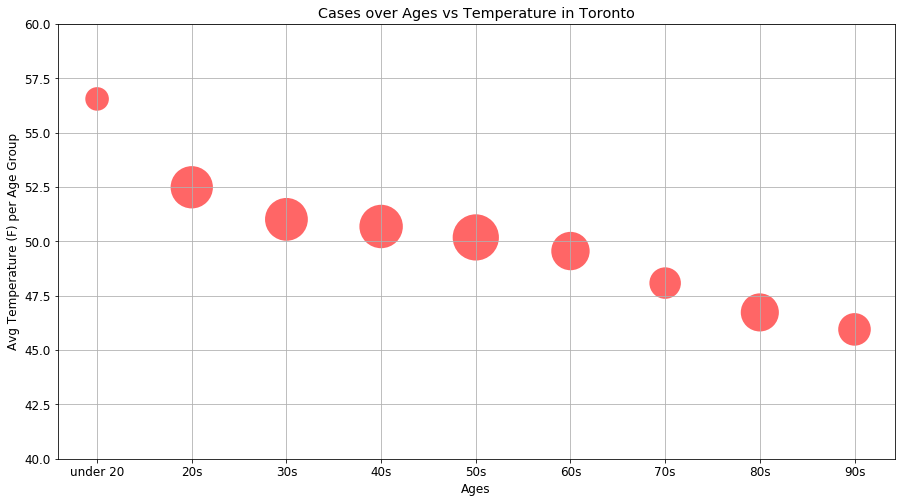

In [87]:
#plotting bubble graph for Cases over Ages vs Temperature in Toronto

x_values = ["under 20", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s"]
y_values = [ageunder20_temp ,age20_temp, age30_temp,age40_temp,age50_temp,age60_temp,age70_temp, age80_temp, age90_temp]
z_values = [ageunder20_count, age20_count,age30_count,age40_count,age50_count,age60_count,age70_count,age80_count, age90_count]
plt.figure(figsize=(15,8))
plt.scatter(x_values,y_values,s=z_values,c="red", alpha=0.6, edgecolor="none")
plt.ylim(top=60)
plt.ylim(bottom=40)
plt.grid()
plt.title("Cases over Ages vs Temperature in Toronto")
plt.xlabel("Ages")
plt.ylabel("Avg Temperature (F) per Age Group")
plt.savefig('images/Cases over Ages vs Temperature in Toronto.png')
plt.show()
#temperature does not seem to be a driver that impacts the number of cases per specific age range.

In [88]:
case_p_df = vertical_stack["Case Reported Date"].value_counts().sort_index()
df_case = pd.DataFrame(case_p_df)
count_df = df_case.reset_index()

In [89]:
count_df.rename(columns={"index": "Case Reported Date", "Case Reported Date": "Cases per day"}, inplace=True)
count_df.head()

Case Reported Date  Cases per day
0         2020-01-23              2
1         2020-02-21              1
2         2020-02-25              1
3         2020-02-26              1
4         2020-02-27              1

In [90]:
case_df = vertical_stack[["Case Reported Date", "Temp Avg (F)", "Humidity Avg", "Wind Speed Avg (mph)"]]
toronto_weather_df = case_df.drop_duplicates()
toronto_weather_df.head()

Case Reported Date  Temp Avg (F)  Humidity Avg  Wind Speed Avg (mph)
0         2020-01-23          32.4          76.9                   5.3
0         2020-02-21          25.6          62.0                  19.3
1         2020-02-25          38.7          74.3                   9.8
2         2020-02-26          32.7          83.5                  11.1
3         2020-02-27          25.9          71.4                  28.5

In [91]:
toronto_combined_clean = pd.merge(toronto_weather_df, count_df, on="Case Reported Date", how="outer")
toronto_combined_clean.head()

Case Reported Date  Temp Avg (F)  Humidity Avg  Wind Speed Avg (mph)  \
0         2020-01-23          32.4          76.9                   5.3   
1         2020-02-21          25.6          62.0                  19.3   
2         2020-02-25          38.7          74.3                   9.8   
3         2020-02-26          32.7          83.5                  11.1   
4         2020-02-27          25.9          71.4                  28.5   

   Cases per day  
0              2  
1              1  
2              1  
3              1  
4              1

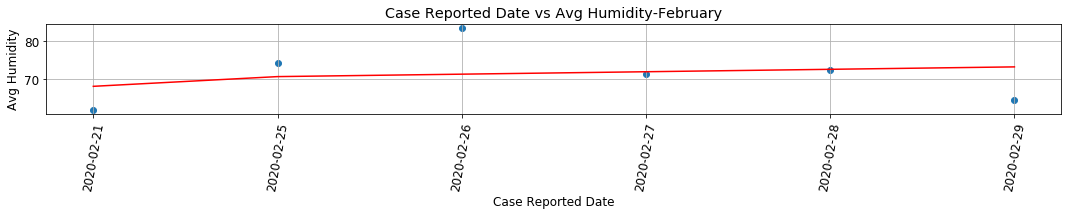

In [92]:
x = pd.to_datetime(toronto_feb_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_feb_merged["Case Reported Date"].sort_values()
y_values = toronto_feb_merged["Humidity Avg"]
title_ab = "Case Reported Date vs Avg Humidity-February"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Humidity"

line_regress(x_values, y_values)

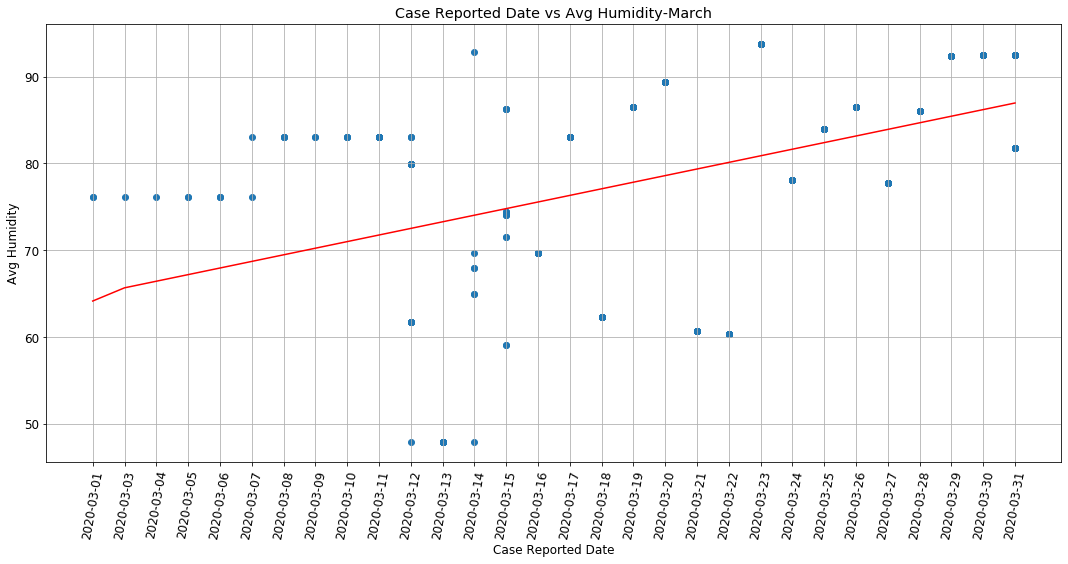

In [93]:
x = pd.to_datetime(toronto_mar_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_mar_merged["Case Reported Date"].sort_values()
y_values = toronto_mar_merged["Humidity Avg"]
title_ab = "Case Reported Date vs Avg Humidity-March"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Humidity"

line_regress(x_values, y_values)

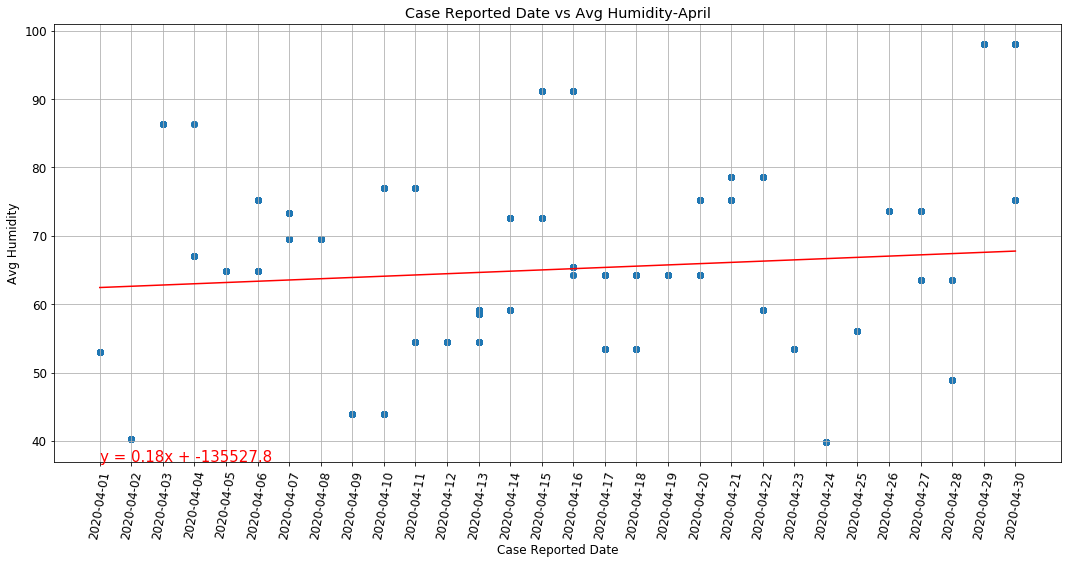

In [94]:
x = pd.to_datetime(toronto_apr_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_apr_merged["Case Reported Date"].sort_values()
y_values = toronto_apr_merged["Humidity Avg"]
title_ab = "Case Reported Date vs Avg Humidity-April"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Humidity"

line_regress(x_values, y_values)

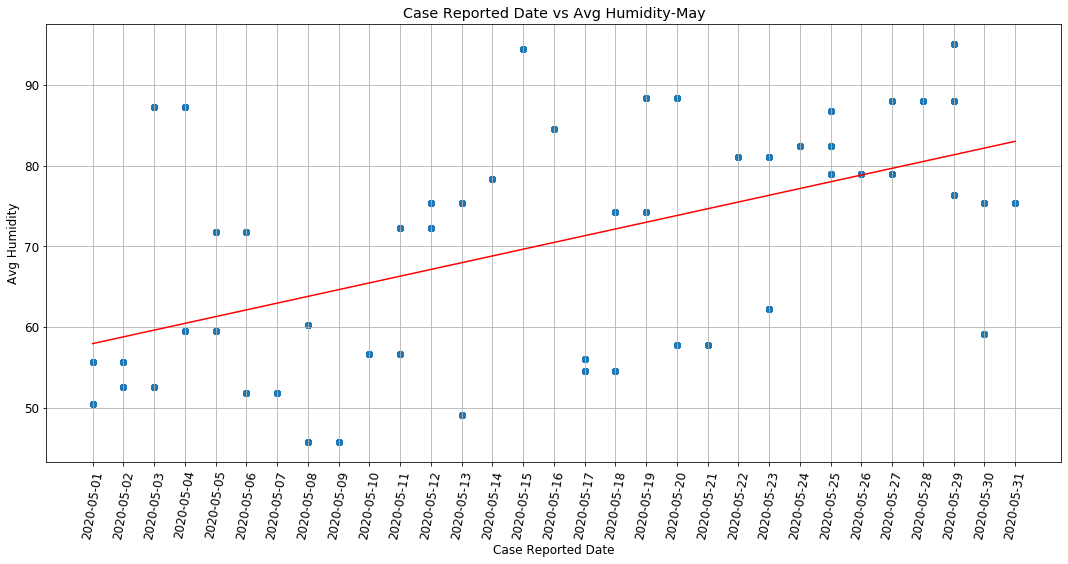

In [95]:
x = pd.to_datetime(toronto_may_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_may_merged["Case Reported Date"].sort_values()
y_values = toronto_may_merged["Humidity Avg"]
title_ab = "Case Reported Date vs Avg Humidity-May"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Humidity"

line_regress(x_values, y_values)

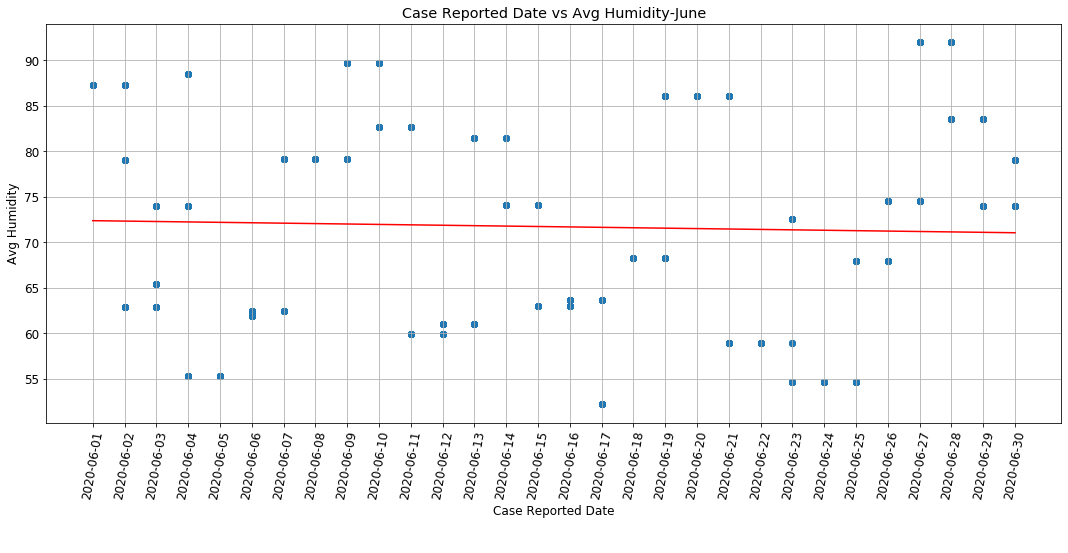

In [96]:
x = pd.to_datetime(toronto_jun_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_jun_merged["Case Reported Date"].sort_values()
y_values = toronto_jun_merged["Humidity Avg"]
title_ab = "Case Reported Date vs Avg Humidity-June"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Humidity"

line_regress(x_values, y_values)

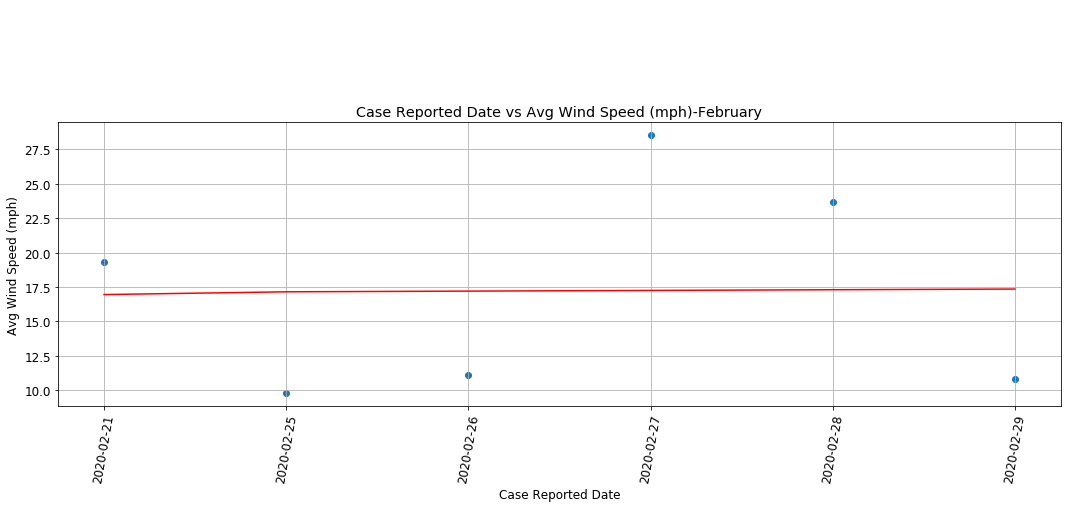

In [97]:
x = pd.to_datetime(toronto_feb_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_feb_merged["Case Reported Date"].sort_values()
y_values = toronto_feb_merged["Wind Speed Avg (mph)"]
title_ab = "Case Reported Date vs Avg Wind Speed (mph)-February"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Wind Speed (mph)"

line_regress(x_values, y_values)

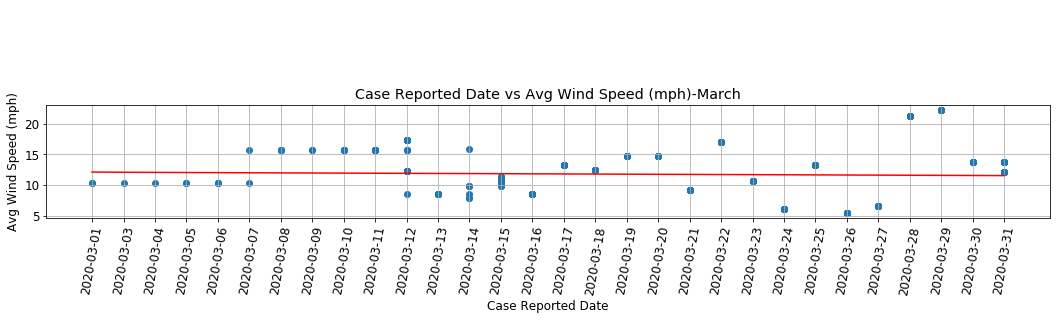

In [98]:
x = pd.to_datetime(toronto_mar_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_mar_merged["Case Reported Date"].sort_values()
y_values = toronto_mar_merged["Wind Speed Avg (mph)"]
title_ab = "Case Reported Date vs Avg Wind Speed (mph)-March"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Wind Speed (mph)"

line_regress(x_values, y_values)

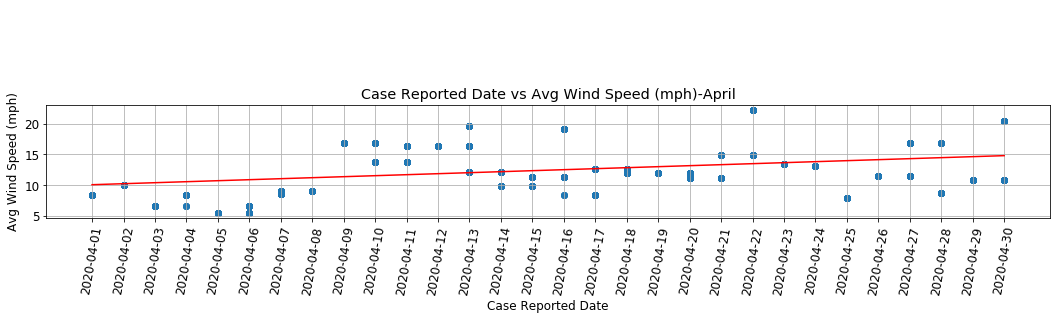

In [99]:
x = pd.to_datetime(toronto_apr_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_apr_merged["Case Reported Date"].sort_values()
y_values = toronto_apr_merged["Wind Speed Avg (mph)"]
title_ab = "Case Reported Date vs Avg Wind Speed (mph)-April"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Wind Speed (mph)"

line_regress(x_values, y_values)

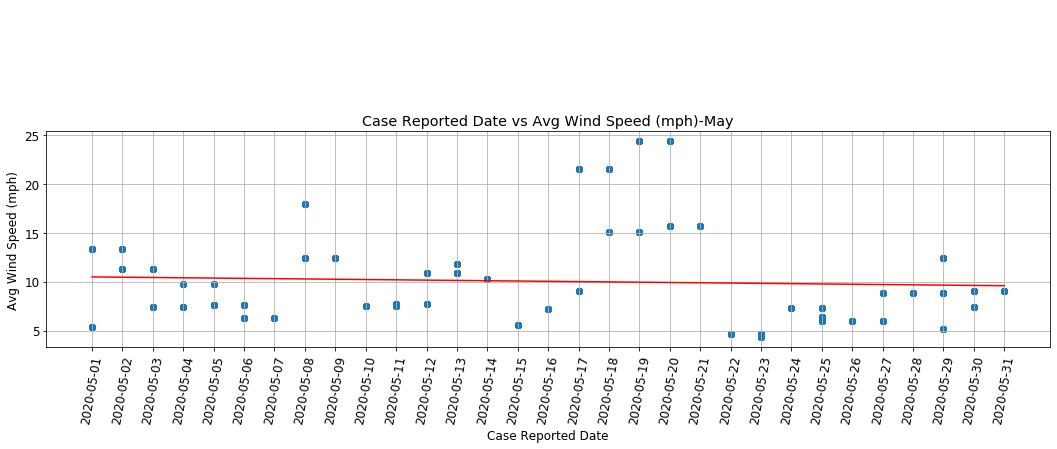

In [100]:
x = pd.to_datetime(toronto_may_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_may_merged["Case Reported Date"].sort_values()
y_values = toronto_may_merged["Wind Speed Avg (mph)"]
title_ab = "Case Reported Date vs Avg Wind Speed (mph)-May"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Wind Speed (mph)"

line_regress(x_values, y_values)

/Users/dayothompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



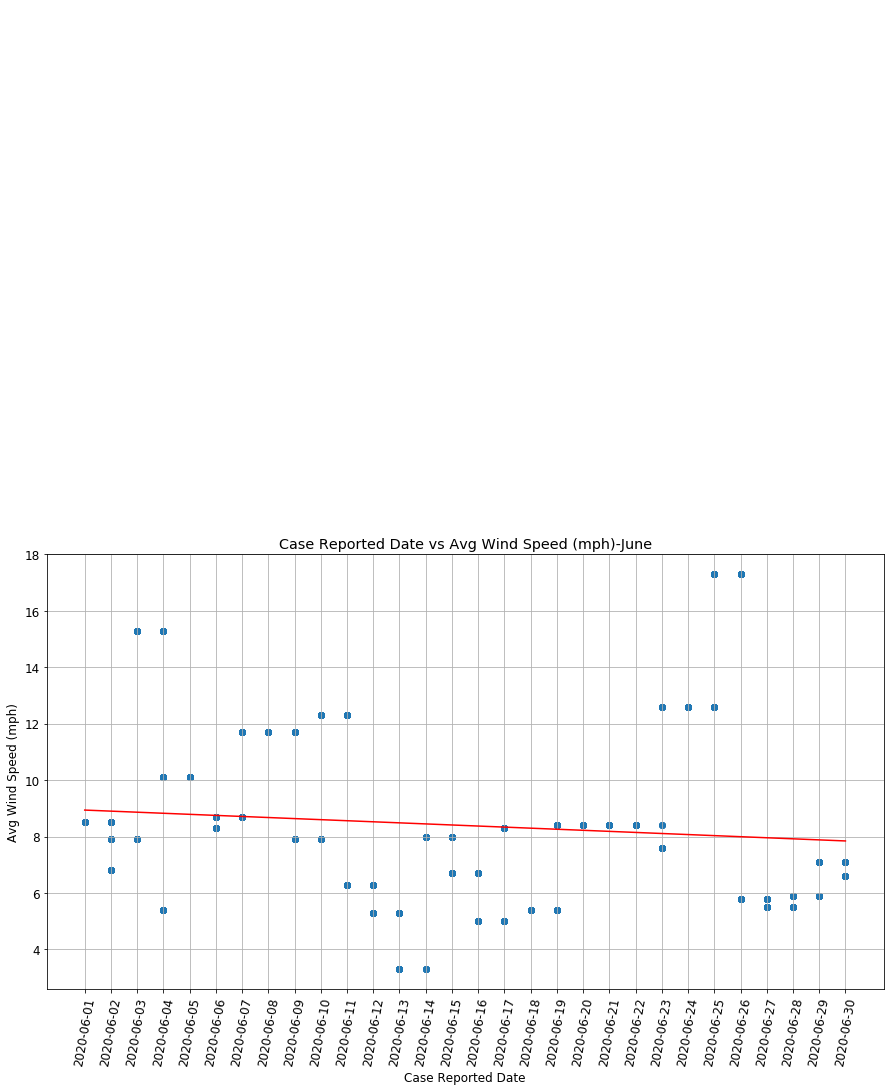

In [101]:
x = pd.to_datetime(toronto_jun_merged["Case Reported Date"].sort_values().values).map(dt.datetime.toordinal)
x_values = toronto_jun_merged["Case Reported Date"].sort_values()
y_values = toronto_jun_merged["Wind Speed Avg (mph)"]
title_ab = "Case Reported Date vs Avg Wind Speed (mph)-June"
xlabel_ab = "Case Reported Date"
ylabel_ab = "Avg Wind Speed (mph)"

line_regress(x_values, y_values)